In [3]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from shapely.validation import make_valid
# if using windows make sure you have kaleido installed, more specifically have this version installed in order to write an image 
# pip install kaleido==0.1.0post1 

In [4]:
Palestinian_Land_Mass = gpd.read_file('July2025\PalestinianLandMass.geojson')
Seam_Zone = gpd.read_file('July2025\PalestinianSeamZoneLand.geojson')
East_Jerusalem = gpd.read_file('BoundariesFiles\EastJerusalemBoundary.geojson')
Oslo_Agreement = gpd.read_file('BoundariesFiles\OsloAgreementJurisdictionBorders.geojson')
Governorates = gpd.read_file('BoundariesFiles\GovernoratesBoundaries.geojson')
Admin_IP = gpd.read_file('BoundariesFiles\IsraeliAdminBoundaries.geojson')
Israeli_Land_Mass = gpd.read_file('BoundariesFiles\IsraeliLandMass.geojson')

In [5]:
Palestinian_Land_Mass = Palestinian_Land_Mass.rename(columns= {'Area_Sqmi': 'Area_sqmi'})
Palestinian_Land_Mass.head()

,Shape_Leng,fid_1,OBJECTID,CLASS,fid_2,id,Name,Area_sqmi,Shape_Area,Display,geometry
0,0.001910,6.0,2,B,19.0,0.0,None,5.062810e-06,1.250000e-09,Palestinian Controlled Land in Area B,"MULTIPOLYGON (((35.43724 32.25828, 35.43708 32..."
1,0.000383,8.0,2,B,24.0,0.0,None,1.063400e-07,3.000000e-11,Palestinian Controlled Land in Area B,"MULTIPOLYGON (((35.39831 32.44642, 35.39828 32..."
2,0.001539,10.0,2,B,61.0,0.0,None,2.009800e-05,4.980000e-09,Palestinian Controlled Land in Area B,"MULTIPOLYGON (((35.22463 32.30746, 35.22476 32..."
3,0.002628,16.0,2,B,68.0,0.0,None,6.317170e-06,1.560000e-09,Palestinian Controlled Land in Area B,"MULTIPOLYGON (((35.19069 32.19946, 35.19045 32..."
4,0.000570,25.0,2,B,119.0,0.0,None,4.425100e-06,1.100000e-09,Palestinian Controlled Land in Area B,"MULTIPOLYGON (((35.06455 32.26977, 35.06459 32..."


In [6]:
Seam_Zone.head()

,fid_1,Name,descriptio,timestamp,begin,end,altitudeMo,tessellate,extrude,visibility,drawOrder,icon,fid_2,OBJECTID,CLASS,Area_sqmi,Display,geometry
0,3.0,Wadi Hummus Seam Zone,None,None,None,None,None,-1.0,0.0,-1.0,NaN,None,5.0,31,A,0.067720,Palestinian Controlled Land in Seam Zone (Area A),"MULTIPOLYGON Z (((35.25498 31.72707 0, 35.2548..."
1,3.0,Wadi Hummus Seam Zone,None,None,None,None,None,-1.0,0.0,-1.0,NaN,None,9.0,2,B,0.011980,Palestinian Controlled Land in Seam Zone (Area B),"MULTIPOLYGON Z (((35.25221 31.71783 0, 35.2512..."
2,6.0,Dahiyat Al-Barid Seam Zone,None,None,None,None,None,-1.0,0.0,-1.0,NaN,None,9.0,2,B,0.004399,Palestinian Controlled Land in Seam Zone (Area B),"MULTIPOLYGON Z (((35.23326 31.84467 0, 35.2335..."
3,46.0,Jerusalem Seam Zone,None,None,None,None,None,-1.0,0.0,-1.0,NaN,None,5.0,31,A,0.001916,Palestinian Controlled Land in Seam Zone (Area A),"MULTIPOLYGON Z (((35.22191 31.71312 0, 35.2217..."
4,102.0,Al Khalayleh,None,None,None,None,None,-1.0,0.0,-1.0,NaN,None,9.0,2,B,0.000519,Palestinian Controlled Land in Seam Zone (Area B),"MULTIPOLYGON Z (((35.15416 31.84811 0, 35.1539..."


In [7]:
East_Jerusalem = East_Jerusalem.rename(columns= {'AreaSqmi': 'Area_sqmi'})
East_Jerusalem.head()

,FID_Palest,FID_Israel,fid_1,name,Area_sqmi,Shape_Leng,Shape_Area,geometry
0,1,1,6.0,Jerusalem District,27.771932,0.876729,0.006849,"MULTIPOLYGON Z (((35.15403 31.73361 0, 35.1528..."


In [8]:
Oslo_Agreement.head()

,fid,OBJECTID,CLASS,Area_sqmi,Display,geometry
0,1,2,B,0.233596,Area B,"MULTIPOLYGON (((35.18188 31.81809, 35.18188 31..."
1,2,3,Nature Reserve,64.320607,Nature Reserve,"MULTIPOLYGON (((35.26058 31.66194, 35.26179 31..."
2,3,8,H1,8.174100,Area H1,"MULTIPOLYGON (((35.09078 31.56492, 35.0928 31...."
3,4,13,H2,1.764582,Area H2,"MULTIPOLYGON (((35.11685 31.55101, 35.11681 31..."
4,5,31,A,379.276631,Area A,"MULTIPOLYGON (((35.1087 31.48692, 35.10945 31...."


In [9]:
Governorates = Governorates.rename(columns= {'Area': 'Area_sqmi'})
Governorates.head()

,fid,Name,description,OBJECTID,Governorates_Code,Governorates_Name,Males,Females,Both_Sexes,source,GlobalID,SHAPE_Length,SHAPE_Area,Area_sqmi,geometry
0,1,Jericho Governorate,,1,1235,Jericho,25101,24901,50002,Palestinian Central Bureau of Statistics,{B80A233F-B6DD-4F48-9EA8-884E0F874CB2},2.20545724288011,0.0565625420820693,228.907754,"POLYGON Z ((35.55733 32.19472 0, 35.55697 32.1..."
1,2,Rafah Governorate,,2,2475,Rafah,117851,116027,233878,Palestinian Central Bureau of Statistics,{F7E0ED01-4DF2-497E-B48C-EF7D2C8CA133},0.393634995327973,0.00598068512305806,24.379025,"POLYGON Z ((34.24258 31.34257 0, 34.24256 31.3..."
2,3,North Gaza Governorate,,3,2455,North Gaza,187763,181215,368978,Palestinian Central Bureau of Statistics,{329D683A-4BB3-414C-918B-07C7BFE9FFB7},0.33571470955106,0.00578407747866047,23.513266,"POLYGON Z ((34.56261 31.53005 0, 34.56377 31.5..."
3,4,Tulkarm Governorate,,4,1110,Tulkarm,95017,91743,186760,Palestinian Central Bureau of Statistics,{1B338273-BB97-4927-A65C-E316ED66E462},1.23306680209806,0.0236031574368086,95.167483,"POLYGON Z ((35.08341 32.45692 0, 35.08319 32.4..."
4,5,Jerusalem Governorate,,5,1240,Jerusalem,225909,209844,435753,Palestinian Central Bureau of Statistics,{E70320E9-0CF3-4477-AC0D-D22D32681930},1.59413220206152,0.0332742592226449,134.898428,"POLYGON Z ((35.22255 31.88586 0, 35.22238 31.8..."


In [10]:
Admin_IP["CLASS"] = ["IP", "IP", "IP", "IP", "IP", "S", "IP"] # S (Syria) for golan heights since Golan Heights will be excluded from area calculations
Admin_IP["Area_sqmi"] = ["0", "0", "0", "0", "0", "0", "0"] # 0 as the default value
Admin_IP.head(8)

,fid,name,geometry,CLASS,Area_sqmi
0,2,Haifa District,"POLYGON ((35.0953 32.87382, 35.09658 32.87374,...",IP,0
1,3,Central District,"POLYGON ((34.98755 31.96782, 34.98782 31.96773...",IP,0
2,4,Tel Aviv District,"POLYGON ((34.80558 32.20292, 34.80927 32.20211...",IP,0
3,5,Southern District,"POLYGON ((34.48869 31.48246, 34.48904 31.48272...",IP,0
4,6,Jerusalem District,"POLYGON ((34.96092 31.60303, 34.95933 31.60529...",IP,0
5,7,Golan Heights,"POLYGON ((35.67199 32.69118, 35.67153 32.69088...",S,0
6,8,Northern District,"POLYGON ((35.10337 33.09434, 35.10357 33.09429...",IP,0


In [11]:
Israeli_Land_Mass.head()

,fid,Shape_Leng,Shape_Area,Name,Area_sqmi,Nationality,geometry
0,1,0.000400,9.950000e-09,Jerusalem Old City Houses,None,Israeli,"POLYGON ((35.23437 31.78208, 35.23448 31.78209..."
1,2,0.000426,1.053000e-08,Jerusalem Old City Houses,None,Israeli,"POLYGON ((35.23351 31.78185, 35.23338 31.78184..."
2,3,0.000211,2.680000e-09,Jerusalem Old City Houses,None,Israeli,"POLYGON ((35.23343 31.78173, 35.23345 31.7817,..."
3,4,0.000262,3.580000e-09,Jerusalem Old City Houses,None,Israeli,"POLYGON ((35.23324 31.78181, 35.23325 31.78177..."
4,5,0.000247,3.670000e-09,Jerusalem Old City Houses,None,Israeli,"POLYGON ((35.23317 31.78224, 35.23324 31.78224..."


In [12]:
gdf_dict = {"Palestinian Land Mass": Palestinian_Land_Mass, "Israeli Land Mass": Israeli_Land_Mass, "Seam Zone": Seam_Zone, "East Jerusalem": East_Jerusalem, "Oslo Agreement Jurisdiction Borders": Oslo_Agreement, "West Bank Governorates Boundaries": Governorates, "Israeli Admin Boundaries": Admin_IP}

for gdf_name, gdf in gdf_dict.items():
  print(f"CRS for {gdf_name}: {gdf.crs}")

CRS for Palestinian Land Mass: EPSG:4326
CRS for Israeli Land Mass: EPSG:4326
CRS for Seam Zone: EPSG:4326
CRS for East Jerusalem: EPSG:4326
CRS for Oslo Agreement Jurisdiction Borders: EPSG:4326
CRS for West Bank Governorates Boundaries: EPSG:4326
CRS for Israeli Admin Boundaries: EPSG:4326


Show a map for each one

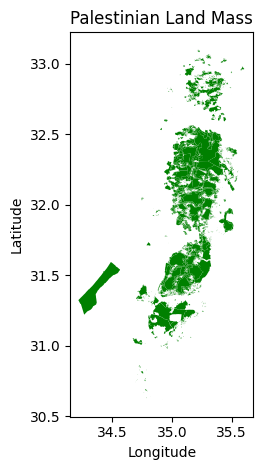

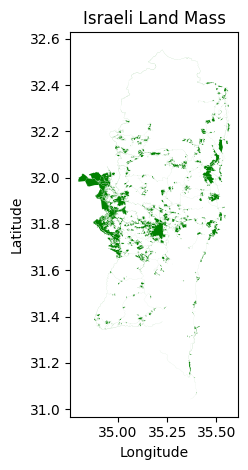

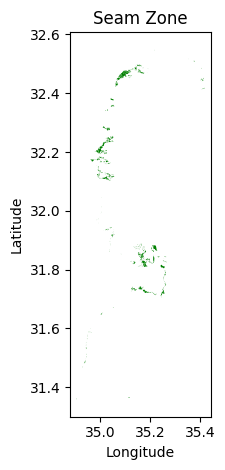

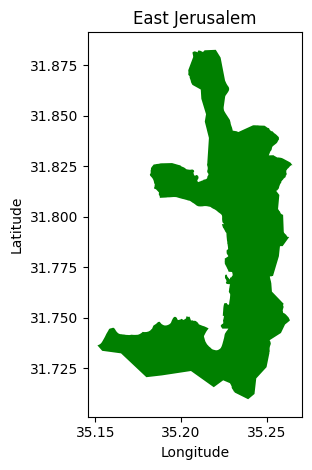

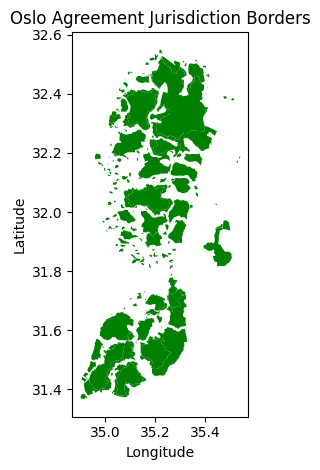

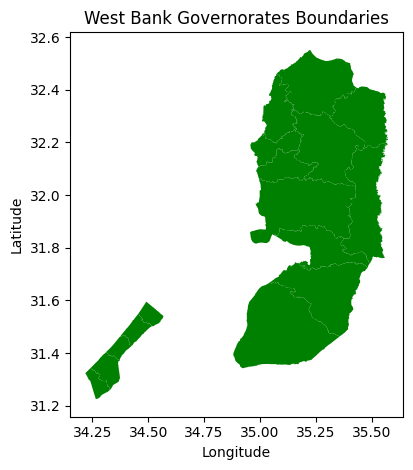

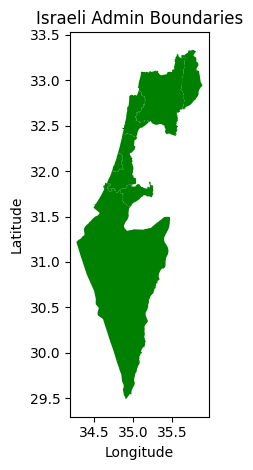

In [13]:
for gdf_name, gdf in gdf_dict.items():
  gdf.plot(facecolor = "green")
  plt.title(f"{gdf_name}")
  plt.xlabel('Longitude')
  plt.ylabel('Latitude')
  plt.tight_layout()
  print('\n')

Change CRS for Area Calculation to Palestine 1923

In [14]:
for gdf_name, gdf in gdf_dict.items():
  gdf_dict[gdf_name] = gdf.to_crs(epsg = 28191) # Palestine 1923 / Palestine Grid
  print(f"CRS for {gdf_name}: {gdf_dict[gdf_name].crs}")
  #gdf.plot(facecolor = "green")
  #plt.title(f"{gdf_name}")
  #plt.xlabel('Longitude')
  #plt.ylabel('Latitude')
  #plt.tight_layout()
  #print('\n')

CRS for Palestinian Land Mass: EPSG:28191
CRS for Israeli Land Mass: EPSG:28191
CRS for Seam Zone: EPSG:28191
CRS for East Jerusalem: EPSG:28191
CRS for Oslo Agreement Jurisdiction Borders: EPSG:28191
CRS for West Bank Governorates Boundaries: EPSG:28191
CRS for Israeli Admin Boundaries: EPSG:28191


In [15]:
for gdf_name, gdf in gdf_dict.items():
    gdf['Area_sqmi'] = gdf['geometry'].to_crs(epsg=28191).area * 3.8610215854245e-7  # Palestine 1923 / Palestine Grid, convert square meters to square miles

# update the geodataframes and print them
Palestinian_Land_Mass = gdf_dict["Palestinian Land Mass"]
print("Palestinian Land Mass:")
print(Palestinian_Land_Mass.head())

Israeli_Land_Mass = gdf_dict["Israeli Land Mass"]
print("Israeli Land Mass:")
print(Israeli_Land_Mass.head())

Seam_Zone = gdf_dict["Seam Zone"]
print("\nSeam Zone:")
print(Seam_Zone.head())

East_Jerusalem = gdf_dict["East Jerusalem"]
print("\nEast Jerusalem:")
print(East_Jerusalem.head())

Oslo_Agreement = gdf_dict["Oslo Agreement Jurisdiction Borders"]
print("\nOslo Agreement Jurisdiction Borders:")
print(Oslo_Agreement.head())

Governorates = gdf_dict["West Bank Governorates Boundaries"]
print("\nWest Bank Governorates Boundaries:")
print(Governorates.head())

Admin_IP = gdf_dict["Israeli Admin Boundaries"]
print("\nIsraeli Admin Boundaries:")
print(Admin_IP.head())

Palestinian Land Mass:
   Shape_Leng  fid_1 OBJECTID CLASS  fid_2   id  Name     Area_sqmi  \
0    0.001910    6.0        2     B   19.0  0.0  None  5.063132e-06   
1    0.000383    8.0        2     B   24.0  0.0  None  1.063480e-07   
2    0.001539   10.0        2     B   61.0  0.0  None  2.009798e-05   
3    0.002628   16.0        2     B   68.0  0.0  None  6.318803e-06   
4    0.000570   25.0        2     B  119.0  0.0  None  4.425225e-06   

     Shape_Area                                Display  \
0  1.250000e-09  Palestinian Controlled Land in Area B   
1  3.000000e-11  Palestinian Controlled Land in Area B   
2  4.980000e-09  Palestinian Controlled Land in Area B   
3  1.560000e-09  Palestinian Controlled Land in Area B   
4  1.100000e-09  Palestinian Controlled Land in Area B   

                                            geometry  
0  MULTIPOLYGON (((191392.337 184981.698, 191377....  
1  MULTIPOLYGON (((187685.562 205837.1, 187682.89...  
2  MULTIPOLYGON (((171357.078 190411

Make Geometries Valid

In [16]:
# Fix Geometry
Palestinian_Land_Mass['geometry'] = Palestinian_Land_Mass.geometry.apply(make_valid)
Seam_Zone['geometry'] = Seam_Zone.geometry.apply(make_valid)
East_Jerusalem['geometry'] = East_Jerusalem.geometry.apply(make_valid)
Oslo_Agreement['geometry'] = Oslo_Agreement.geometry.apply(make_valid)
Governorates['geometry'] = Governorates.geometry.apply(make_valid)
Admin_IP['geometry'] = Admin_IP.geometry.apply(make_valid)
Israeli_Land_Mass['geometry'] = Israeli_Land_Mass.geometry.apply(make_valid)

Initialize Summary Statistics DataFrame

In [17]:
summary_statistics_df = pd.DataFrame({'class': ['IP', 'A', 'B', 'C', 'Gaza Strip', 'H1', 'H2', 'Nature Reserve', 'East Jerusalem'], 'total_area_of_boundaries': [0,0,0,0,0,0,0,0,0],'sum_area_sqmi': [0,0,0,0,0,0,0,0,0], 'percentage': [0,0,0,0,0,0,0,0,0]})

summary_statistics_df["total_area_of_boundaries"] = summary_statistics_df["total_area_of_boundaries"].astype(float)
summary_statistics_df["sum_area_sqmi"] = summary_statistics_df["sum_area_sqmi"].astype(float)
summary_statistics_df["percentage"] = summary_statistics_df["percentage"].astype(float)

summary_statistics_df.head(summary_statistics_df.shape[0])

,class,total_area_of_boundaries,sum_area_sqmi,percentage
0,IP,0.0,0.0,0.0
1,A,0.0,0.0,0.0
2,B,0.0,0.0,0.0
3,C,0.0,0.0,0.0
4,Gaza Strip,0.0,0.0,0.0
5,H1,0.0,0.0,0.0
6,H2,0.0,0.0,0.0
7,Nature Reserve,0.0,0.0,0.0
8,East Jerusalem,0.0,0.0,0.0


Aggregate the total area of each boundary

In [18]:
israel_proper_area = Admin_IP['Area_sqmi'].groupby(Admin_IP['CLASS']).sum().iloc[0] - East_Jerusalem['Area_sqmi'].iloc[0] # total area for Israel proper excluding golan heights with east jeusalem so delete it
area_a_area = Oslo_Agreement['Area_sqmi'].groupby(Oslo_Agreement['CLASS']).sum().iloc[0] # total area for Area A
area_b_area = Oslo_Agreement['Area_sqmi'].groupby(Oslo_Agreement['CLASS']).sum().iloc[1] # total area for Area B
area_h1_area = Oslo_Agreement['Area_sqmi'].groupby(Oslo_Agreement['CLASS']).sum().iloc[2] # total area for Area H1
area_h2_area = Oslo_Agreement['Area_sqmi'].groupby(Oslo_Agreement['CLASS']).sum().iloc[3] # total area for Area H2
nature_reserve_area = Oslo_Agreement['Area_sqmi'].groupby(Oslo_Agreement['CLASS']).sum().iloc[4] # total area for the Nature Reserve
east_jerusalem_area = East_Jerusalem['Area_sqmi'].iloc[0]  # total area for the East Jerusalem
Governorates["Governorates_Code"] = Governorates["Governorates_Code"].astype(int)
gaza_strip_area = Governorates['Area_sqmi'].groupby(Governorates["Governorates_Code"] > 2000).sum().iloc[1] # total area for the gaza strip
west_bank_area = Governorates['Area_sqmi'].groupby(Governorates["Governorates_Code"] > 2000).sum().iloc[0] # gets all the aggregated false (west bank) values
west_bank_no_east_jerusalem_area = west_bank_area - east_jerusalem_area
area_c_area = west_bank_no_east_jerusalem_area - area_a_area - area_b_area - area_h1_area - area_h2_area - nature_reserve_area

# assign each row to their corresponding area

summary_statistics_df.loc[0, "total_area_of_boundaries"] = israel_proper_area
summary_statistics_df.loc[1, "total_area_of_boundaries"] = area_a_area
summary_statistics_df.loc[2, "total_area_of_boundaries"] = area_b_area
summary_statistics_df.loc[3, "total_area_of_boundaries"] = area_c_area
summary_statistics_df.loc[4, "total_area_of_boundaries"] = gaza_strip_area
summary_statistics_df.loc[5, "total_area_of_boundaries"] = area_h1_area
summary_statistics_df.loc[6, "total_area_of_boundaries"] = area_h2_area
summary_statistics_df.loc[7, "total_area_of_boundaries"] = nature_reserve_area
summary_statistics_df.loc[8, "total_area_of_boundaries"] = east_jerusalem_area



summary_statistics_df.head(summary_statistics_df.shape[0])

,class,total_area_of_boundaries,sum_area_sqmi,percentage
0,IP,8087.730543,0.0,0.0
1,A,379.289372,0.0,0.0
2,B,399.666127,0.0,0.0
3,C,1304.483562,0.0,0.0
4,Gaza Strip,140.908859,0.0,0.0
5,H1,8.174373,0.0,0.0
6,H2,1.764640,0.0,0.0
7,Nature Reserve,64.322689,0.0,0.0
8,East Jerusalem,27.772885,0.0,0.0


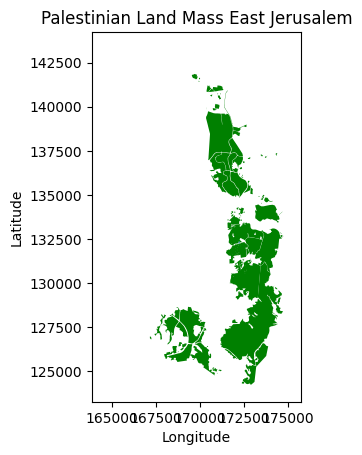

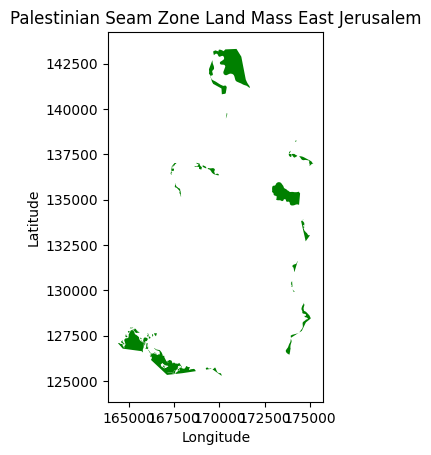

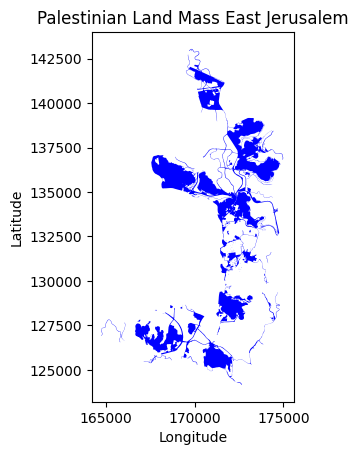

In [19]:
Palestinian_Land_Mass_East_Jerusalem = gpd.clip(Palestinian_Land_Mass, East_Jerusalem)
Palestinian_Land_Mass_East_Jerusalem.plot(facecolor = "green")
plt.title(f"Palestinian Land Mass East Jerusalem")
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

Palestinian_Seam_Zone_East_Jerusalem = gpd.clip(Seam_Zone, East_Jerusalem)
Palestinian_Seam_Zone_East_Jerusalem.plot(facecolor = "green")
plt.title(f"Palestinian Seam Zone Land Mass East Jerusalem")
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

Israeli_Land_Mass_East_Jerusalem = gpd.clip(Israeli_Land_Mass, East_Jerusalem)
Israeli_Land_Mass_East_Jerusalem.plot(facecolor = "blue")
plt.title(f"Palestinian Land Mass East Jerusalem")
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

In [20]:
Palestinian_Seam_Zone_East_Jerusalem.head()

,fid_1,Name,descriptio,timestamp,begin,end,altitudeMo,tessellate,extrude,visibility,drawOrder,icon,fid_2,OBJECTID,CLASS,Area_sqmi,Display,geometry
419,444.0,Al-Walaja Seam Zone,None,None,None,None,None,-1.0,0.0,-1.0,NaN,None,NaN,None,EJ,0.327277,Palestinian Developed Land in Seam Zone (East ...,"POLYGON Z ((164555.889 127040.846 0, 164624.94..."
17,35.0,Jerusalem Seam Zone,None,None,None,None,None,-1.0,0.0,-1.0,NaN,None,NaN,None,EJ,0.010537,Palestinian Developed Land in Seam Zone (East ...,"POLYGON Z ((164658.846 127192.12 0, 164685.889..."
20,38.0,Jerusalem Seam Zone,None,None,None,None,None,-1.0,0.0,-1.0,NaN,None,NaN,None,EJ,0.003645,Palestinian Developed Land in Seam Zone (East ...,"POLYGON Z ((164840.941 127568.444 0, 164858.76..."
24,42.0,Jerusalem Seam Zone,None,None,None,None,None,-1.0,0.0,-1.0,NaN,None,NaN,None,EJ,0.002704,Palestinian Developed Land in Seam Zone (East ...,"POLYGON Z ((164980.963 127754.645 0, 165071.54..."
26,44.0,Jerusalem Seam Zone,None,None,None,None,None,-1.0,0.0,-1.0,NaN,None,NaN,None,EJ,0.002040,Palestinian Developed Land in Seam Zone (East ...,"POLYGON Z ((165150.552 127937.476 0, 165151.27..."


Get Total Palestinian developed land area in East Jerusalem

In [21]:
# check crs
print(Palestinian_Land_Mass_East_Jerusalem.crs)
print(Palestinian_Seam_Zone_East_Jerusalem.crs)
Palestinian_Land_Mass_East_Jerusalem['Area_sqmi'] = Palestinian_Land_Mass_East_Jerusalem['geometry'].area * 3.861e-7 #sqmi
Palestinian_Seam_Zone_East_Jerusalem['Area_sqmi'] = Palestinian_Seam_Zone_East_Jerusalem['geometry'].area * 3.861e-7 #sqmi
Palestinian_Land_Mass_EJ_area = Palestinian_Land_Mass_East_Jerusalem['Area_sqmi'].groupby(Palestinian_Land_Mass_East_Jerusalem['CLASS']).sum().iloc[1]
#print(Palestinian_Land_Mass_East_Jerusalem['Area_sqmi'].groupby(Palestinian_Land_Mass_East_Jerusalem['CLASS']).sum())
Palestinian_Land_Mass_Seam_Zone_EJ_area = Palestinian_Seam_Zone_East_Jerusalem['Area_sqmi'].groupby(Palestinian_Seam_Zone_East_Jerusalem['CLASS']).sum().iloc[1]
#print(Palestinian_Seam_Zone_East_Jerusalem['Area_sqmi'].groupby(Palestinian_Seam_Zone_East_Jerusalem['CLASS']).sum())
total_palestinian_developed_land_east_jerusalem = Palestinian_Land_Mass_EJ_area + Palestinian_Land_Mass_Seam_Zone_EJ_area
print(f'Total Palestinian developed land in East Jerusalem: {total_palestinian_developed_land_east_jerusalem}sqmi')
print(Palestinian_Land_Mass_Seam_Zone_EJ_area)
#Palestinian_Seam_Zone_East_Jerusalem['Area_sqmi']

EPSG:28191
EPSG:28191
Total Palestinian developed land in East Jerusalem: 13.728766746458119sqmi
2.5129477364400237


Get Total Palestinian developed/controlled land area in Area A, Area b, Area C, Area H1, Area H2, the nature reserve and the gaza strip

In [22]:
total_palestinian_developed_land_israel_proper = Palestinian_Land_Mass['Area_sqmi'].groupby(Palestinian_Land_Mass['CLASS']).sum().iloc[0]
total_palestinian_controlled_land_area_a = Palestinian_Land_Mass['Area_sqmi'].groupby(Palestinian_Land_Mass['CLASS']).sum().iloc[1] + Seam_Zone['Area_sqmi'].groupby(Seam_Zone['CLASS']).sum().iloc[0]
total_palestinian_controlled_land_area_b = Palestinian_Land_Mass['Area_sqmi'].groupby(Palestinian_Land_Mass['CLASS']).sum().iloc[2] + Seam_Zone['Area_sqmi'].groupby(Seam_Zone['CLASS']).sum().iloc[1]
total_palestinian_developed_land_area_c = Palestinian_Land_Mass['Area_sqmi'].groupby(Palestinian_Land_Mass['CLASS']).sum().iloc[3] + Seam_Zone['Area_sqmi'].groupby(Seam_Zone['CLASS']).sum().iloc[2]
total_palestinian_developed_land_gaza_strip = Palestinian_Land_Mass['Area_sqmi'].groupby(Palestinian_Land_Mass['CLASS']).sum().iloc[5]
total_palestinian_controlled_land_area_h1 = Palestinian_Land_Mass['Area_sqmi'].groupby(Palestinian_Land_Mass['CLASS']).sum().iloc[6]
total_palestinian_developed_land_area_h2 = Palestinian_Land_Mass['Area_sqmi'].groupby(Palestinian_Land_Mass['CLASS']).sum().iloc[7]
total_palestinian_controlled_land_nature_reserve = Palestinian_Land_Mass['Area_sqmi'].groupby(Palestinian_Land_Mass['CLASS']).sum().iloc[8]
print(Palestinian_Land_Mass['Area_sqmi'].groupby(Palestinian_Land_Mass['CLASS']).sum())
#Seam_Zone['Area_sqmi'].groupby(Seam_Zone['CLASS']).sum()
print(Palestinian_Land_Mass['Area_sqmi'].groupby(Palestinian_Land_Mass['CLASS']).sum().iloc[5])

CLASS
48                423.411914
A                 379.192286
B                 398.889027
C                 395.472584
EJ                 11.264237
Gaza Strip        138.234256
H1                  8.165439
H2                  1.716989
Nature Reserve     64.296233
Name: Area_sqmi, dtype: float64
138.2342564163857



Assign each row to their corresponding area

In [23]:
print(total_palestinian_controlled_land_area_b)
print(total_palestinian_developed_land_gaza_strip)

summary_statistics_df.loc[0, "sum_area_sqmi"] = total_palestinian_developed_land_israel_proper
summary_statistics_df.loc[1, "sum_area_sqmi"] = total_palestinian_controlled_land_area_a
summary_statistics_df.loc[2, "sum_area_sqmi"] = total_palestinian_controlled_land_area_b
summary_statistics_df.loc[3, "sum_area_sqmi"] = total_palestinian_developed_land_area_c
summary_statistics_df.loc[4, "sum_area_sqmi"] = total_palestinian_developed_land_gaza_strip
summary_statistics_df.loc[5, "sum_area_sqmi"] = total_palestinian_controlled_land_area_h1
summary_statistics_df.loc[6, "sum_area_sqmi"] = total_palestinian_developed_land_area_h2
summary_statistics_df.loc[7, "sum_area_sqmi"] = total_palestinian_controlled_land_nature_reserve
summary_statistics_df.loc[8, "sum_area_sqmi"] = total_palestinian_developed_land_east_jerusalem
summary_statistics_df.head(summary_statistics_df.shape[0])

399.50315367563843
138.2342564163857


,class,total_area_of_boundaries,sum_area_sqmi,percentage
0,IP,8087.730543,423.411914,0.0
1,A,379.289372,379.258667,0.0
2,B,399.666127,399.503154,0.0
3,C,1304.483562,409.762257,0.0
4,Gaza Strip,140.908859,138.234256,0.0
5,H1,8.174373,8.165439,0.0
6,H2,1.764640,1.716989,0.0
7,Nature Reserve,64.322689,64.296233,0.0
8,East Jerusalem,27.772885,13.728767,0.0


Calculate Percentage

In [24]:
summary_statistics_df['percentage'] = (summary_statistics_df["sum_area_sqmi"] / summary_statistics_df["total_area_of_boundaries"]) * 100
summary_statistics_df.head(summary_statistics_df.shape[0])

,class,total_area_of_boundaries,sum_area_sqmi,percentage
0,IP,8087.730543,423.411914,5.235238
1,A,379.289372,379.258667,99.991905
2,B,399.666127,399.503154,99.959223
3,C,1304.483562,409.762257,31.411838
4,Gaza Strip,140.908859,138.234256,98.101892
5,H1,8.174373,8.165439,99.890717
6,H2,1.764640,1.716989,97.299669
7,Nature Reserve,64.322689,64.296233,99.958870
8,East Jerusalem,27.772885,13.728767,49.432266


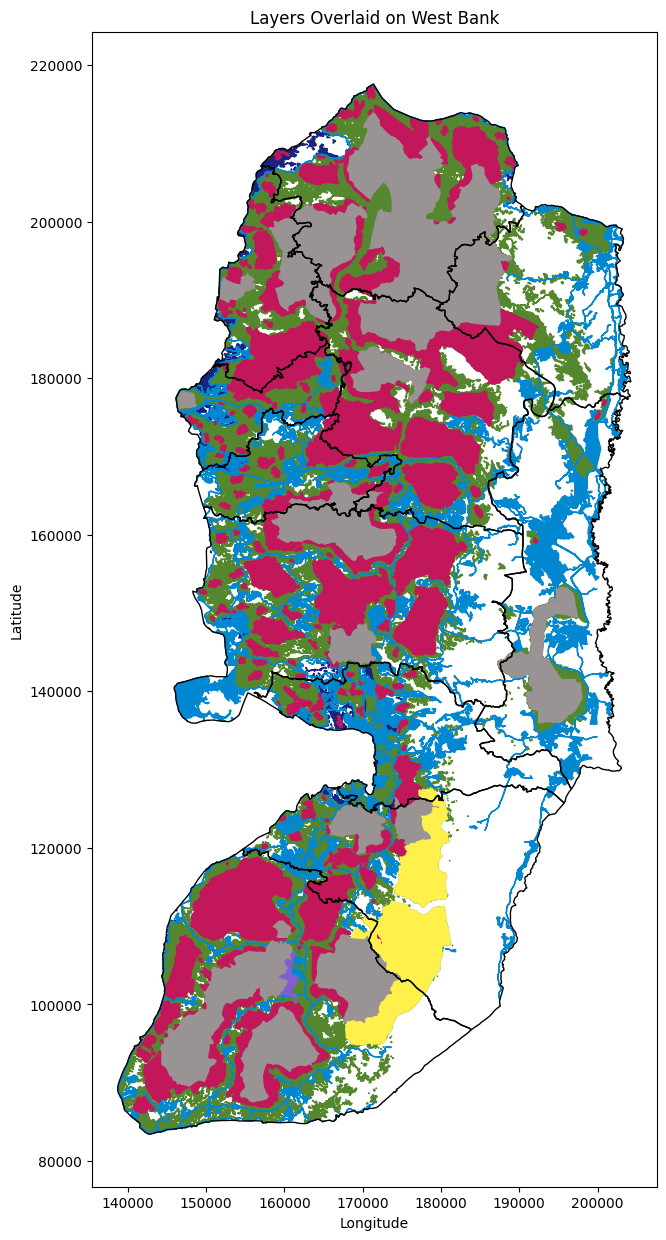

In [25]:
# Clip each layer to the West Bank
West_Bank_Governorates = Governorates[Governorates['Governorates_Code'] < 2000] # West bank 
Palestinian_Land_Mass_clipped = gpd.clip(Palestinian_Land_Mass, West_Bank_Governorates)
Seam_Zone_clipped = gpd.clip(Seam_Zone, West_Bank_Governorates)
Oslo_Agreement_clipped = gpd.clip(Oslo_Agreement, West_Bank_Governorates)
Israeli_Land_Mass_clipped = gpd.clip(Israeli_Land_Mass, West_Bank_Governorates)

# Define custom color palette
palette_color = {
    'A': '#999393', 
    'B': '#C2185B', 
    'H1': '#999393', 
    'H2': '#815ED3', 
    'Nature Reserve': '#FFF04C'
}

# Plot for Visualization
fig, ax = plt.subplots(figsize=(15, 15))


# Plot Seam Zone layer
Seam_Zone_clipped.plot(ax=ax, facecolor='#1a237e', edgecolor='#1a237e', label='Seam Zone')

# Plot Palestinian Land Mass layer
Palestinian_Land_Mass_clipped.plot(ax=ax, facecolor='#55872F', edgecolor='#55872F', label='Palestinian Land Mass')

# Plot Israeli Land Mass layer
Israeli_Land_Mass_clipped.plot(ax=ax, facecolor='#0288d1', edgecolor='#0288d1', label = 'Israeli Land Mass')

# Plot Oslo layer with opacity and color by classes
for class_name, color in palette_color.items():
    Oslo_Agreement_clipped[Oslo_Agreement_clipped['CLASS'] == class_name].plot(ax=ax, facecolor=color, edgecolor=color, label=class_name)
# Plot Governorates layer
West_Bank_Governorates.plot(ax=ax, facecolor='none', edgecolor='black', label='West Bank Governorates')

plt.title('Layers Overlaid on West Bank')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

Automate the Pie Charts

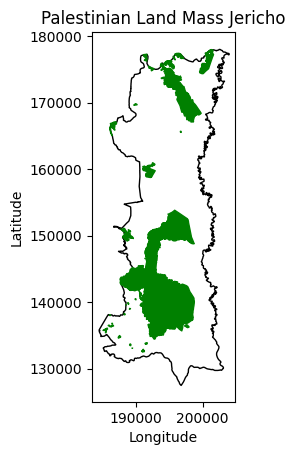

In [26]:
# Jericho Governorate
West_Bank_Governorates = Governorates[Governorates['Governorates_Code'] < 2000]
Jericho_gov = West_Bank_Governorates[West_Bank_Governorates['Governorates_Name'] == 'Jericho']
# Clip to Governorate
Jericho_land_mass = gpd.clip(Palestinian_Land_Mass, Jericho_gov)
# Calculate Area for clipped layer
Jericho_land_mass['Area_sqmi'] = Jericho_land_mass['geometry'].to_crs(epsg=28191).area * 3.8610215854245e-7
# Plot for visualization
fig, ax = plt.subplots()
Jericho_gov.plot(ax = ax, facecolor = "white", edgecolor = "black", label = "Jericho Governorate")
Jericho_land_mass.plot(ax = ax, facecolor = "green", edgecolor = "green", label = "Palestinian Land Mass in Jericho")
plt.title(f"Palestinian Land Mass Jericho")
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

# Calculate the land mass in areas a, b, c etc..
Jericho_gov_area_a_area = Jericho_land_mass[Jericho_land_mass['CLASS'] == 'A']['Area_sqmi'].sum()
Jericho_gov_area_b_area = Jericho_land_mass[Jericho_land_mass['CLASS'] == 'B']['Area_sqmi'].sum()
Jericho_gov_area_c_area = Jericho_land_mass[Jericho_land_mass['CLASS'] == 'C']['Area_sqmi'].sum()
Jericho_gov_area = Governorates[Governorates["Governorates_Name"] == "Jericho"]["Area_sqmi"].iloc[0]
open_or_israeli_area = Jericho_gov_area - Jericho_gov_area_a_area - Jericho_gov_area_b_area - Jericho_gov_area_c_area

# Percentages (Not needed)
Jericho_area_a_percentage = (Jericho_gov_area_a_area / Jericho_gov_area) * 100
Jericho_area_b_percentage = (Jericho_gov_area_b_area / Jericho_gov_area) * 100
Jericho_area_c_percentage = (Jericho_gov_area_c_area / Jericho_gov_area) * 100
open_or_israeli_percentage = 100 - Jericho_area_a_percentage - Jericho_area_b_percentage - Jericho_area_c_percentage

# declaring data from land mass calculations
data = [Jericho_gov_area_a_area, Jericho_gov_area_b_area, Jericho_gov_area_c_area, open_or_israeli_area]
data2 = [Jericho_area_a_percentage, Jericho_area_b_percentage, Jericho_area_c_percentage, open_or_israeli_percentage]

# Custom color palette and labels
label_color_dict = {'Palestinian Area A' : '#999393', 'Palestinian Area B' : '#C2185B', 'Palestinian Area C' : '#55872F', 'Undeveloped/Israeli' : '#0000FF'}
labels = list(label_color_dict.keys())
palette_color = list(label_color_dict.values())
custom_labels = [f'{label} ({round(value, 2)})' for label, value in zip(labels, data)]

# Pie chart using plotly
fig = go.Figure(
    data=[
        go.Pie(
            labels=custom_labels,
            values=data,
            marker=dict(colors=palette_color)
            
        )
    ]
)

fig.update_traces(textposition='inside',       # puts text inside the pie chart
                    textinfo = 'percent'        # shows us the percent and the area in sqmi ('percent+label' to show both)
                    )      # color of the labels inside the pie chart are set to white

fig.update_layout(
    paper_bgcolor='black',       # background color around the plot  
    plot_bgcolor='black',        # background color of the plot
    font_color='white',          # color of the legend and title
    title={
        'text': 'Jericho Governorate Area Distribution (Sqmi)',
        'x': 0.5,                # Middle
        'y': 0.90,                # Nearly at the top
        'xanchor': 'center',
        'yanchor': 'middle',
        'font': {'size': 34}     # Increase font size for the title
    },
    legend={
        'font': {'size': 18},     # Increase font size for the legend
        'x': 1,                   # Position legend to the right of the pie chart
        'y': 0.5,                 # Position legend in the middle
        'xanchor': 'left',
        'yanchor': 'middle'
    },
    annotations=[
        dict(
            text="*Undeveloped/Israeli is land that is currently undeveloped by anyone in Area C or land that is developed by Israelis in Area C",
            x=0.7,
            y=0.05,
            showarrow=False,
            font=dict(color='white', size=12),
            xanchor='center'
        ),
        dict(
            text="July 2025<br>© Palestinian Land Demographics 2025",
            x=1.05,
            y=0.25,
            showarrow=False,
            font=dict(color='white', size=12),
            xanchor='left',
            yanchor='top'
        )
    ],
    width=1000,                  # width and height of the pie chart
    height=1000
)

fig.write_html('July2025\PieCharts_HTML\Jericho_Governorate_Area_Distribution_Pie_Chart.html')
fig.write_image('July2025\PieCharts_JPG\Jericho_Governorate_Area_Distribution_Pie_Chart.jpg')
fig.show()


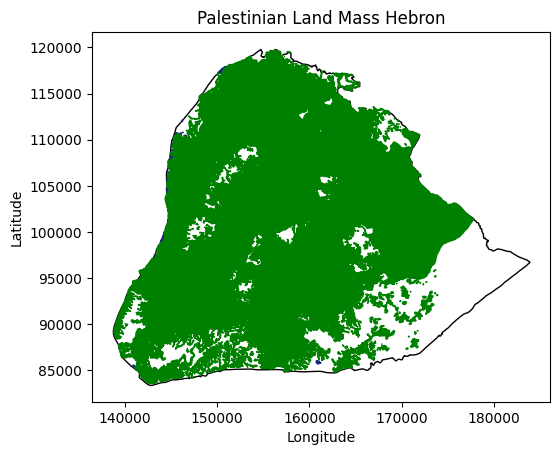

In [27]:
# Hebron Governorate
West_Bank_Governorates = Governorates[Governorates['Governorates_Code'] < 2000]
Hebron_gov = West_Bank_Governorates[West_Bank_Governorates['Governorates_Name'] == 'Hebron']
# Clip to Governorate
Hebron_land_mass = gpd.clip(Palestinian_Land_Mass, Hebron_gov)
Hebron_seam_zone = gpd.clip(Seam_Zone, Hebron_gov)
# Calculate Area for clipped layer
Hebron_land_mass['Area_sqmi'] = Hebron_land_mass['geometry'].to_crs(epsg=28191).area * 3.8610215854245e-7
Hebron_seam_zone['Area_sqmi'] = Hebron_seam_zone['geometry'].to_crs(epsg=28191).area * 3.8610215854245e-7
# Plot for Visualization
fig, ax = plt.subplots()
Hebron_gov.plot(ax = ax, facecolor = "white", edgecolor = "black", label = "Hebron Governorate")
Hebron_seam_zone.plot(ax=ax, facecolor = "#1a237e", edgecolor = "#1a237e", label = "Palestinian Seam Zone in Hebron")
Hebron_land_mass.plot(ax = ax, facecolor = "green", edgecolor = "green", label = "Palestinian Land Mass in Hebron")
plt.title(f"Palestinian Land Mass Hebron")
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()
# Calculate the land mass in areas a, b, c etc..
Hebron_gov_area_a_area = Hebron_land_mass[Hebron_land_mass['CLASS'] == 'A']['Area_sqmi'].sum()
Hebron_gov_area_b_area = Hebron_land_mass[Hebron_land_mass['CLASS'] == 'B']['Area_sqmi'].sum()
Hebron_area_c_seam_zone = Hebron_seam_zone[Hebron_seam_zone['CLASS'] == 'C']['Area_sqmi'].sum()
Hebron_gov_area_c_area = Hebron_land_mass[Hebron_land_mass['CLASS'] == 'C']['Area_sqmi'].sum() + Hebron_area_c_seam_zone # for total Palestinian land in Area C
Hebron_gov_area_h1_area = Hebron_land_mass[Hebron_land_mass['CLASS'] == 'H1']['Area_sqmi'].sum()
Hebron_gov_area_h2_area = Hebron_land_mass[Hebron_land_mass['CLASS'] == 'H2']['Area_sqmi'].sum()
Hebron_gov_nature_reserve_area = Hebron_land_mass[Hebron_land_mass['CLASS'] == 'Nature Reserve']['Area_sqmi'].sum()
Hebron_gov_area = Governorates[Governorates["Governorates_Name"] == "Hebron"]["Area_sqmi"].iloc[0]
open_or_israeli_area = Hebron_gov_area - Hebron_gov_area_a_area - Hebron_gov_area_b_area - Hebron_gov_area_c_area - Hebron_gov_area_h1_area - Hebron_gov_area_h2_area - Hebron_gov_nature_reserve_area

# declaring data from land mass calculations
data = [Hebron_gov_area_a_area, Hebron_gov_area_b_area, Hebron_gov_area_c_area, Hebron_gov_area_h1_area, Hebron_gov_area_h2_area, Hebron_gov_nature_reserve_area, open_or_israeli_area]

# Custom color palette and labels
label_color_dict = {'Palestinian Area A' : '#999393', 'Palestinian Area B' : '#C2185B', 'Palestinian Area C' : '#55872F', 'Palestinian Area H1' : '#999393', 'Palestinian Area H2' : '#815ED3', 'Palestinian Nature Reserve' : '#FFF04C', 'Undeveloped/Israeli' : '#0000FF'}
labels = list(label_color_dict.keys())
palette_color = list(label_color_dict.values())
custom_labels = [f'{label} ({round(value, 2)})' for label, value in zip(labels, data)]

# Pie chart using plotly
fig = go.Figure(
    data=[
        go.Pie(
            labels=custom_labels,
            values=data,
            marker=dict(colors=palette_color)
            
        )
    ]
)

fig.update_traces(textposition='inside',       # puts text inside the pie chart
                    textinfo = 'percent',        # shows us the percent and the area in sqmi ('percent+label' to show both)
                    textfont_color='white')      # color of the labels inside the pie chart are set to white

fig.update_layout(
    paper_bgcolor='black',       # background color around the plot  
    plot_bgcolor='black',        # background color of the plot
    font_color='white',          # color of the legend and title
    title={
        'text': 'Hebron Governorate Area Distribution (Sqmi)',
        'x': 0.5,                # Middle
        'y': 0.90,                # Nearly at the top
        'xanchor': 'center',
        'yanchor': 'middle',
        'font': {'size': 34}     # Increase font size for the title
    },
    legend={
        'font': {'size': 18},     # Increase font size for the legend
        'x': 1,                   # Position legend to the right of the pie chart
        'y': 0.5,                 # Position legend in the middle
        'xanchor': 'left',
        'yanchor': 'middle'
    },
    annotations=[
        dict(
            text="*Undeveloped/Israeli is land that is currently undeveloped by anyone in Area C or land that is developed by Israelis in Areas C, H1 and H2",
            x=0.7,
            y=0.05,
            showarrow=False,
            font=dict(color='white', size=12),
            xanchor='center'
        ),
        dict(
            text="July 2025<br>© Palestinian Land Demographics 2025",
            x=1.05,
            y=0.25,
            showarrow=False,
            font=dict(color='white', size=12),
            xanchor='left',
            yanchor='top'
        )
    ],
    
    width=1000,                  # width and height of the pie chart
    height=1000
)

fig.write_html('July2025\PieCharts_HTML\Hebron_Governorate_Area_Distribution_Pie_Chart.html')
fig.write_image('July2025\PieCharts_JPG\Hebron_Governorate_Area_Distribution_Pie_Chart.jpg')
fig.show()



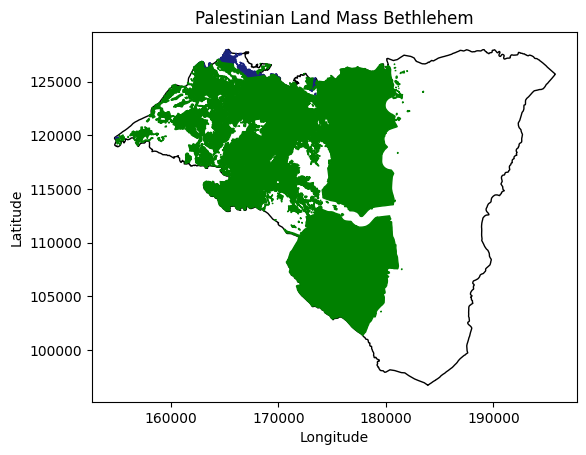

253.04564228035608


In [28]:

# Bethlehem Governorate
West_Bank_Governorates = Governorates[Governorates['Governorates_Code'] < 2000]
Bethlehem_gov = West_Bank_Governorates[West_Bank_Governorates['Governorates_Name'] == 'Bethlehem']
# Clip to Governorate
Bethlehem_land_mass = gpd.clip(Palestinian_Land_Mass, Bethlehem_gov)
Bethlehem_seam_zone = gpd.clip(Seam_Zone, Bethlehem_gov)
# Calculate Area for clipped layer
Bethlehem_land_mass['Area_sqmi'] = Bethlehem_land_mass['geometry'].to_crs(epsg=28191).area * 3.8610215854245e-7
Bethlehem_seam_zone['Area_sqmi'] = Bethlehem_seam_zone['geometry'].to_crs(epsg=28191).area * 3.8610215854245e-7
# Plot for Visualization
fig, ax = plt.subplots()
Bethlehem_gov.plot(ax = ax, facecolor = "white", edgecolor = "black", label = "Bethlehem Governorate")
Bethlehem_seam_zone.plot(ax=ax, facecolor = "#1a237e", edgecolor = "#1a237e", label = "Palestinian Seam Zone in Bethlehem")
Bethlehem_land_mass.plot(ax = ax, facecolor = "green", edgecolor = "green", label = "Palestinian Land Mass in Bethlehem")
plt.title(f"Palestinian Land Mass Bethlehem")
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()
# Calculate the land mass in areas a, b, c etc..
# Bethlehem_seam_zone['Area_sqmi'].groupby([Bethlehem_seam_zone['CLASS']]).sum()
Bethlehem_gov_area_a_area = Bethlehem_land_mass[Bethlehem_land_mass['CLASS'] == 'A']['Area_sqmi'].sum()
Bethlehem_gov_area_b_area = Bethlehem_land_mass[Bethlehem_land_mass['CLASS'] == 'B']['Area_sqmi'].sum()
Bethlehem_area_c_seam_zone = Bethlehem_seam_zone[Bethlehem_seam_zone['CLASS'] == 'C']['Area_sqmi'].sum()
Bethlehem_gov_area_c_area = Bethlehem_land_mass[Bethlehem_land_mass['CLASS'] == 'C']['Area_sqmi'].sum() + Bethlehem_area_c_seam_zone # for total Palestinian land in Area C
Bethlehem_gov_nature_reserve_area = Bethlehem_land_mass[Bethlehem_land_mass['CLASS'] == 'Nature Reserve']['Area_sqmi'].sum()
Bethlehem_gov_area = Governorates[Governorates["Governorates_Name"] == "Bethlehem"]["Area_sqmi"].iloc[0]
print(Bethlehem_gov_area)
open_or_israeli_area = Bethlehem_gov_area - Bethlehem_gov_area_a_area - Bethlehem_gov_area_b_area - Bethlehem_gov_area_c_area - Bethlehem_gov_nature_reserve_area

# declaring data from land mass calculations
data = [Bethlehem_gov_area_a_area, Bethlehem_gov_area_b_area, Bethlehem_gov_area_c_area, Bethlehem_gov_nature_reserve_area, open_or_israeli_area]

# Custom color palette and labels
label_color_dict = {'Palestinian Area A' : '#999393', 'Palestinian Area B' : '#C2185B', 'Palestinian Area C' : '#55872F','Palestinian Nature Reserve' : '#FFF04C', 'Undeveloped/Israeli' : '#0000FF'}
labels = list(label_color_dict.keys())
palette_color = list(label_color_dict.values())
custom_labels = [f'{label} ({round(value, 2)})' for label, value in zip(labels, data)]

# Pie chart using plotly
fig = go.Figure(
    data=[
        go.Pie(
            labels=custom_labels,
            values=data,
            marker=dict(colors=palette_color)
            
        )
    ]
)

fig.update_traces(textposition='inside',       # puts text inside the pie chart
                    textinfo = 'percent'        # shows us the percent and the area in sqmi ('percent+label' to show both)
                    )      # color of the labels inside the pie chart are set to white

fig.update_layout(
    paper_bgcolor='black',       # background color around the plot  
    plot_bgcolor='black',        # background color of the plot
    font_color='white',          # color of the legend and title
    title={
        'text': 'Bethlehem Governorate Area Distribution (Sqmi)',
        'x': 0.5,                # Middle
        'y': 0.90,                # Nearly at the top
        'xanchor': 'center',
        'yanchor': 'middle',
        'font': {'size': 34}     # Increase font size for the title
    },
    legend={
        'font': {'size': 18},     # Increase font size for the legend
        'x': 1,                   # Position legend to the right of the pie chart
        'y': 0.5,                 # Position legend in the middle
        'xanchor': 'left',
        'yanchor': 'middle'
    },
    annotations=[
        dict(
            text="*Undeveloped/Israeli is land that is currently undeveloped by anyone in Area C or land that is developed by Israelis in Areas A, B, C, and the Nature Reserve",
            x=0.7,
            y=0.05,
            showarrow=False,
            font=dict(color='white', size=12),
            xanchor='center'
        ),
        dict(
            text="July 2025<br>© Palestinian Land Demographics 2025",
            x=1.05,
            y=0.25,
            showarrow=False,
            font=dict(color='white', size=12),
            xanchor='left',
            yanchor='top'
        )
    ],
    width=1000,                  # width and height of the pie chart
    height=1000
)

fig.write_html('July2025\PieCharts_HTML\Bethlehem_Governorate_Area_Distribution_Pie_Chart.html')
fig.write_image('July2025\PieCharts_JPG\Bethlehem_Governorate_Area_Distribution_Pie_Chart.jpg')
fig.show()



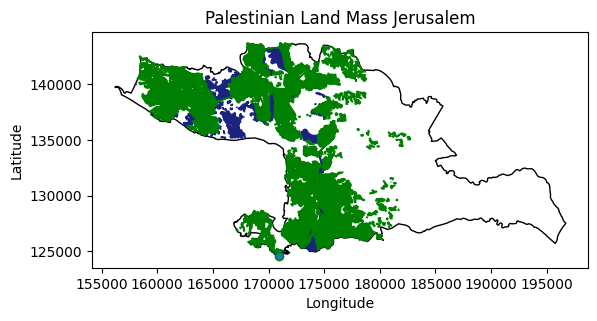

107.1300318416063


In [29]:
# Jerusalem Governorate (Not including East Jerusalem)
West_Bank_Governorates = Governorates[Governorates['Governorates_Code'] < 2000]
Jerusalem_gov = West_Bank_Governorates[West_Bank_Governorates['Governorates_Name'] == 'Jerusalem']
# Clip to Governorate
Jerusalem_land_mass = gpd.clip(Palestinian_Land_Mass, Jerusalem_gov)
Jerusalem_seam_zone = gpd.clip(Seam_Zone, Jerusalem_gov)
# Calculate Area for clipped layer
Jerusalem_land_mass['Area_sqmi'] = Jerusalem_land_mass['geometry'].to_crs(epsg=28191).area * 3.8610215854245e-7
Jerusalem_seam_zone['Area_sqmi'] = Jerusalem_seam_zone['geometry'].to_crs(epsg=28191).area * 3.8610215854245e-7
# Plot for Visualization (Includes East Jerusalem)
fig, ax = plt.subplots()
Jerusalem_gov.plot(ax = ax, facecolor = "white", edgecolor = "black", label = "Jerusalem Governorate")
Jerusalem_seam_zone.plot(ax=ax, facecolor = "#1a237e", edgecolor = "#1a237e", label = "Palestinian Seam Zone in Jerusalem")
Jerusalem_land_mass.plot(ax = ax, facecolor = "green", edgecolor = "green", label = "Palestinian Land Mass in Jerusalem")
plt.title(f"Palestinian Land Mass Jerusalem")
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()
# Calculate the land mass in areas a, b, c etc.. Excludes East Jerusalem, and East Jerusalem land area
# Jerusalem_seam_zone['Area_sqmi'].groupby([Jerusalem_seam_zone['CLASS']]).sum()
# Palestinian_Land_Mass_East_Jerusalem['Area_sqmi'].groupby(Palestinian_Land_Mass_East_Jerusalem['CLASS']).sum()
# Palestinian_Seam_Zone_East_Jerusalem['Area_sqmi'].groupby(Palestinian_Seam_Zone_East_Jerusalem['CLASS']).sum()
Jerusalem_gov_area_a_area = Jerusalem_land_mass[Jerusalem_land_mass['CLASS'] == 'A']['Area_sqmi'].sum() + Jerusalem_seam_zone[Jerusalem_seam_zone['CLASS'] == 'A']['Area_sqmi'].sum()
Jerusalem_gov_area_b_area = Jerusalem_land_mass[Jerusalem_land_mass['CLASS'] == 'B']['Area_sqmi'].sum() + Jerusalem_seam_zone[Jerusalem_seam_zone['CLASS'] == 'B']['Area_sqmi'].sum()
East_Jerusalem_seam_zone_area = Palestinian_Seam_Zone_East_Jerusalem[Palestinian_Seam_Zone_East_Jerusalem['CLASS'] == 'C']['Area_sqmi'].sum()
Jerusalem_area_c_seam_zone = Jerusalem_seam_zone[Jerusalem_seam_zone['CLASS'] == 'C']['Area_sqmi'].sum() - East_Jerusalem_seam_zone_area # for total Palestinian land in seam zone
East_Jerusalem_area_c_area = Palestinian_Land_Mass_East_Jerusalem[Palestinian_Land_Mass_East_Jerusalem['CLASS'] == 'C']['Area_sqmi'].sum()
Jerusalem_gov_area_c_area = Jerusalem_land_mass[Jerusalem_land_mass['CLASS'] == 'C']['Area_sqmi'].sum() - East_Jerusalem_area_c_area + Jerusalem_area_c_seam_zone # for total Palestinian land in Area C
Jerusalem_gov_nature_reserve_area = Jerusalem_land_mass[Jerusalem_land_mass['CLASS'] == 'Nature Reserve']['Area_sqmi'].sum()
Jerusalem_gov_areaNoEJ = Governorates[Governorates["Governorates_Name"] == "Jerusalem"]["Area_sqmi"].iloc[0] -east_jerusalem_area
print(Jerusalem_gov_areaNoEJ)
open_or_israeli_area = Jerusalem_gov_areaNoEJ - Jerusalem_gov_area_a_area - Jerusalem_gov_area_b_area - Jerusalem_gov_area_c_area - Jerusalem_gov_nature_reserve_area

# declaring data from land mass calculations
data = [Jerusalem_gov_area_a_area, Jerusalem_gov_area_b_area, Jerusalem_gov_area_c_area, Jerusalem_gov_nature_reserve_area, open_or_israeli_area]

# Custom color palette and labels
label_color_dict = {'Palestinian Area A' : '#999393', 'Palestinian Area B' : '#C2185B', 'Palestinian Area C' : '#55872F','Palestinian Nature Reserve' : '#FFF04C', 'Undeveloped/Israeli' : '#0000FF'}
labels = list(label_color_dict.keys())
palette_color = list(label_color_dict.values())
custom_labels = [f'{label} ({round(value, 2)})' for label, value in zip(labels, data)]

# Pie chart using plotly
fig = go.Figure(
    data=[
        go.Pie(
            labels=custom_labels,
            values=data,
            marker=dict(colors=palette_color)
            
        )
    ]
)

fig.update_traces(textposition='inside',       # puts text inside the pie chart
                    textinfo = 'percent'        # shows us the percent and the area in sqmi ('percent+label' to show both)
                    )      # color of the labels inside the pie chart are set to white

fig.update_layout(
    paper_bgcolor='black',       # background color around the plot  
    plot_bgcolor='black',        # background color of the plot
    font_color='white',          # color of the legend and title
    title={
        'text': 'Jerusalem Governorate Area Distribution (Sqmi)<br><sup>East Jerusalem is not included</sup>',
        'x': 0.5,                # Middle
        'y': 0.90,                # Nearly at the top
        'xanchor': 'center',
        'yanchor': 'middle',
        'font': {'size': 34}     # Increase font size for the title
    },
    legend={
        'font': {'size': 18},     # Increase font size for the legend
        'x': 1,                   # Position legend to the right of the pie chart
        'y': 0.5,                 # Position legend in the middle
        'xanchor': 'left',
        'yanchor': 'middle'
    },
    annotations=[
        dict(
            text="*Undeveloped/Israeli is land that is currently undeveloped by anyone in Area C or land that is developed by Israelis in Areas A, B, C, and the Nature Reserve",
            x=0.7,
            y=0.05,
            showarrow=False,
            font=dict(color='white', size=12),
            xanchor='center'
        ),
        dict(
            text="July 2025<br>© Palestinian Land Demographics 2025",
            x=1.05,
            y=0.25,
            showarrow=False,
            font=dict(color='white', size=12),
            xanchor='left',
            yanchor='top'
        )
    ],
    width=1000,                  # width and height of the pie chart
    height=1000
)

fig.write_html('July2025\PieCharts_HTML\Jerusalem_Governorate_Area_Distribution_Pie_Chart.html')
fig.write_image('July2025\PieCharts_JPG\Jerusalem_Governorate_Area_Distribution_Pie_Chart.jpg')
fig.show()


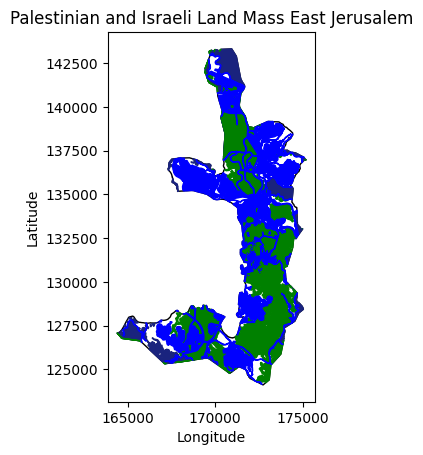

11.215819010018095
2.5129477364400237
27.77288549718713


In [30]:
# East Jerusalem
# Clip to East Jerusalem
East_Jerusalem_land_mass = gpd.clip(Palestinian_Land_Mass, East_Jerusalem) # Palestinian Land Mass in East Jerusalem
East_Jerusalem_seam_zone = gpd.clip(Seam_Zone, East_Jerusalem)
East_Jerusalem_israeli_land_mass = gpd.clip(Israeli_Land_Mass, East_Jerusalem)
#East_Jerusalem_israeli_land_mass.to_file('BoundariesFiles/East_Jerusalem_israeli_land_mass.geojson', driver = 'GeoJSON')
# Calculate Area for clipped layer
East_Jerusalem_land_mass['Area_sqmi'] = Jerusalem_land_mass['geometry'].to_crs(epsg=28191).area * 3.8610215854245e-7
East_Jerusalem_seam_zone['Area_sqmi'] = Jerusalem_seam_zone['geometry'].to_crs(epsg=28191).area * 3.8610215854245e-7
East_Jerusalem_israeli_land_mass['Area_sqmi'] = East_Jerusalem_israeli_land_mass['geometry'].to_crs(epsg=28191).area * 3.8610215854245e-7
# Plot for Visualization (Includes East Jerusalem)
fig, ax = plt.subplots()
East_Jerusalem.plot(ax = ax, facecolor = "white", edgecolor = "black", label = "East Jerusalem")
East_Jerusalem_seam_zone.plot(ax=ax, facecolor = "#1a237e", edgecolor = "#1a237e", label = "Palestinian Seam Zone in East Jerusalem")
East_Jerusalem_land_mass.plot(ax = ax, facecolor = "green", edgecolor = "green", label = "Palestinian Land Mass in East Jerusalem")
East_Jerusalem_israeli_land_mass.plot(ax = ax, facecolor = "blue", edgecolor = "blue", label = "Israeli Land Mass in East Jerusalem")
plt.title(f"Palestinian and Israeli Land Mass East Jerusalem")
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()



# Calculate the land mass in areas a, b, c etc.. Excludes East Jerusalem, and East Jerusalem land area
# Jerusalem_seam_zone['Area_sqmi'].groupby([Jerusalem_seam_zone['CLASS']]).sum()
# Palestinian_Land_Mass_East_Jerusalem['Area_sqmi'].groupby(Palestinian_Land_Mass_East_Jerusalem['CLASS']).sum()
# Palestinian_Seam_Zone_East_Jerusalem['Area_sqmi'].groupby(Palestinian_Seam_Zone_East_Jerusalem['CLASS']).sum()
Palestinian_Land_Mass_East_Jerusalem['Area_sqmi'] = Palestinian_Land_Mass_East_Jerusalem['geometry'].area * 3.861e-7 #sqmi
Palestinian_Seam_Zone_East_Jerusalem['Area_sqmi'] = Palestinian_Seam_Zone_East_Jerusalem['geometry'].area * 3.861e-7 #sqmi
Israeli_Land_Mass_East_Jerusalem['Area_sqmi'] = Israeli_Land_Mass_East_Jerusalem['geometry'].area * 3.861e-7 #sqmi
Palestinian_Land_Mass_EJ_area = Palestinian_Land_Mass_East_Jerusalem['Area_sqmi'].groupby(Palestinian_Land_Mass_East_Jerusalem['CLASS']).sum().iloc[1]
print(Palestinian_Land_Mass_EJ_area)
Palestinian_Land_Mass_Seam_Zone_EJ_area = Palestinian_Seam_Zone_East_Jerusalem['Area_sqmi'].groupby(Palestinian_Seam_Zone_East_Jerusalem['CLASS']).sum().iloc[1]
print(Palestinian_Land_Mass_Seam_Zone_EJ_area)
total_palestinian_developed_land_east_jerusalem = Palestinian_Land_Mass_EJ_area + Palestinian_Land_Mass_Seam_Zone_EJ_area
total_israeli_developed_land_east_jerusalem = Israeli_Land_Mass_East_Jerusalem['Area_sqmi'].groupby(Israeli_Land_Mass_East_Jerusalem['Nationality']).sum().iloc[0]
open_area = east_jerusalem_area - total_palestinian_developed_land_east_jerusalem - total_israeli_developed_land_east_jerusalem
print(east_jerusalem_area)
# declaring data from land mass calculations
data = [total_palestinian_developed_land_east_jerusalem, total_israeli_developed_land_east_jerusalem, open_area]

# Custom color palette and labels
label_color_dict = {'Land Developed by Palestinians' : '#55872F', 'Land Developed by Israelis' : '#0000FF', 'Undeveloped Land' : '#D9AE80'}
labels = list(label_color_dict.keys())
palette_color = list(label_color_dict.values())
custom_labels = [f'{label} ({round(value, 2)})' for label, value in zip(labels, data)]

# Pie chart using plotly
fig = go.Figure(
    data=[
        go.Pie(
            labels=custom_labels,
            values=data,
            marker=dict(colors=palette_color)
            
        )
    ]
)

fig.update_traces(textposition='inside',       # puts text inside the pie chart
                    textinfo = 'percent',        # shows us the percent and the area in sqmi ('percent+label' to show both)
                    textfont_color='white')      # color of the labels inside the pie chart are set to white

fig.update_layout(
    paper_bgcolor='black',       # background color around the plot  
    plot_bgcolor='black',        # background color of the plot
    font_color='white',          # color of the legend and title
    title={
        'text': 'East Jerusalem Area Distribution (Sqmi)',
        'x': 0.5,                # Middle
        'y': 0.90,                # Nearly at the top
        'xanchor': 'center',
        'yanchor': 'middle',
        'font': {'size': 34}     # Increase font size for the title
    },
    legend={
        'font': {'size': 18},     # Increase font size for the legend
        'x': 1,                   # Position legend to the right of the pie chart
        'y': 0.5,                 # Position legend in the middle
        'xanchor': 'left',
        'yanchor': 'middle'
    },
    annotations=[
        dict(
            text="July 2025<br>© Palestinian Land Demographics 2025",
            x=1.05,
            y=0.25,
            showarrow=False,
            font=dict(color='white', size=12),
            xanchor='left',
            yanchor='top'
        )
    ],
    width=1000,                  # width and height of the pie chart
    height=1000
)

fig.write_html('July2025\PieCharts_HTML\East_Jerusalem_Area_Distribution_Pie_Chart.html')
fig.write_image('July2025\PieCharts_JPG\East_Jerusalem_Area_Distribution_Pie_Chart.jpg')
fig.show()



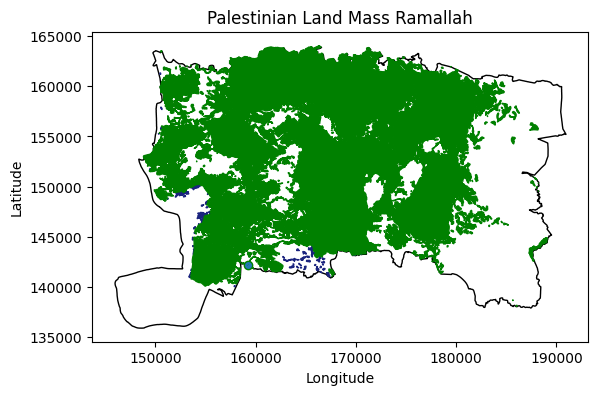

330.2360114702778


In [31]:
# Ramallah Governorate
West_Bank_Governorates = Governorates[Governorates['Governorates_Code'] < 2000]
Ramallah_gov = West_Bank_Governorates[West_Bank_Governorates['Governorates_Name'] == 'Ramallah & Al Bireh']
# Clip to Governorate
Ramallah_land_mass = gpd.clip(Palestinian_Land_Mass, Ramallah_gov)
Ramallah_seam_zone = gpd.clip(Seam_Zone, Ramallah_gov)
# Calculate Area for clipped layer
Ramallah_land_mass['Area_sqmi'] = Ramallah_land_mass['geometry'].to_crs(epsg=28191).area * 3.8610215854245e-7
Ramallah_seam_zone['Area_sqmi'] = Ramallah_seam_zone['geometry'].to_crs(epsg=28191).area * 3.8610215854245e-7
# Plot for Visualization
fig, ax = plt.subplots()
Ramallah_gov.plot(ax = ax, facecolor = "white", edgecolor = "black", label = "Ramallah Governorate")
Ramallah_seam_zone.plot(ax=ax, facecolor = "#1a237e", edgecolor = "#1a237e", label = "Palestinian Seam Zone in Ramallah")
Ramallah_land_mass.plot(ax = ax, facecolor = "green", edgecolor = "green", label = "Palestinian Land Mass in Ramallah")
plt.title(f"Palestinian Land Mass Ramallah")
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()
# Calculate the land mass in areas a, b, c etc..
# Ramallah_seam_zone['Area_sqmi'].groupby([Ramallah_seam_zone['CLASS']]).sum()
Ramallah_gov_area_a_area = Ramallah_land_mass[Ramallah_land_mass['CLASS'] == 'A']['Area_sqmi'].sum()
Ramallah_gov_area_b_area = Ramallah_land_mass[Ramallah_land_mass['CLASS'] == 'B']['Area_sqmi'].sum()
Ramallah_area_c_seam_zone = Ramallah_seam_zone[Ramallah_seam_zone['CLASS'] == 'C']['Area_sqmi'].sum()
Ramallah_gov_area_c_area = Ramallah_land_mass[Ramallah_land_mass['CLASS'] == 'C']['Area_sqmi'].sum() + Ramallah_area_c_seam_zone # for total Palestinian land in Area C
Ramallah_gov_area = Governorates[Governorates["Governorates_Name"] == "Ramallah & Al Bireh"]["Area_sqmi"].iloc[0]
print(Ramallah_gov_area)
open_or_israeli_area = Ramallah_gov_area - Ramallah_gov_area_a_area - Ramallah_gov_area_b_area - Ramallah_gov_area_c_area

# declaring data from land mass calculations
data = [Ramallah_gov_area_a_area, Ramallah_gov_area_b_area, Ramallah_gov_area_c_area, open_or_israeli_area]

# Custom color palette and labels
label_color_dict = {'Palestinian Area A' : '#999393', 'Palestinian Area B' : '#C2185B', 'Palestinian Area C' : '#55872F', 'Undeveloped/Israeli' : '#0000FF'}
labels = list(label_color_dict.keys())
palette_color = list(label_color_dict.values())
custom_labels = [f'{label} ({round(value, 2)})' for label, value in zip(labels, data)]

# Pie chart using plotly
fig = go.Figure(
    data=[
        go.Pie(
            labels=custom_labels,
            values=data,
            marker=dict(colors=palette_color)
            
        )
    ]
)

fig.update_traces(textposition='inside',       # puts text inside the pie chart
                    textinfo = 'percent',        # shows us the percent and the area in sqmi ('percent+label' to show both)
                    textfont_color='white')      # color of the labels inside the pie chart are set to white

fig.update_layout(
    paper_bgcolor='black',       # background color around the plot  
    plot_bgcolor='black',        # background color of the plot
    font_color='white',          # color of the legend and title
    title={
        'text': 'Ramallah Governorate Area Distribution (Sqmi)',
        'x': 0.5,                # Middle
        'y': 0.90,                # Nearly at the top
        'xanchor': 'center',
        'yanchor': 'middle',
        'font': {'size': 34}     # Increase font size for the title
    },
    legend={
        'font': {'size': 18},     # Increase font size for the legend
        'x': 1,                   # Position legend to the right of the pie chart
        'y': 0.5,                 # Position legend in the middle
        'xanchor': 'left',
        'yanchor': 'middle'
    },
    annotations=[
        dict(
            text="*Undeveloped/Israeli is land that is currently undeveloped by anyone in Area C or land that is developed by Israelis in Areas B and C",
            x=0.7,
            y=0.05,
            showarrow=False,
            font=dict(color='white', size=12),
            xanchor='center'
        ),
        dict(
            text="July 2025<br>© Palestinian Land Demographics 2025",
            x=1.05,
            y=0.25,
            showarrow=False,
            font=dict(color='white', size=12),
            xanchor='left',
            yanchor='top'
        )
    ],
    width=1000,                  # width and height of the pie chart
    height=1000
)

fig.write_html('July2025\PieCharts_HTML\Ramallah_Governorate_Area_Distribution_Pie_Chart.html')
fig.write_image('July2025\PieCharts_JPG\Ramallah_Governorate_Area_Distribution_Pie_Chart.jpg')
fig.show()



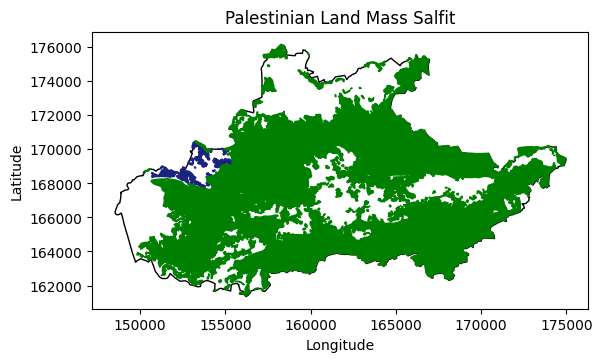

78.93246554658526


In [32]:
# Salfit Governorate
West_Bank_Governorates = Governorates[Governorates['Governorates_Code'] < 2000]
Salfit_gov = West_Bank_Governorates[West_Bank_Governorates['Governorates_Name'] == 'Salfit']
# Clip to Governorate
Salfit_land_mass = gpd.clip(Palestinian_Land_Mass, Salfit_gov)
Salfit_seam_zone = gpd.clip(Seam_Zone, Salfit_gov)
# Calculate Area for clipped layer
Salfit_land_mass['Area_sqmi'] = Salfit_land_mass['geometry'].to_crs(epsg=28191).area * 3.8610215854245e-7
Salfit_seam_zone['Area_sqmi'] = Salfit_seam_zone['geometry'].to_crs(epsg=28191).area * 3.8610215854245e-7
# Plot for Visualization
fig, ax = plt.subplots()
Salfit_gov.plot(ax = ax, facecolor = "white", edgecolor = "black", label = "Salfit Governorate")
Salfit_seam_zone.plot(ax=ax, facecolor = "#1a237e", edgecolor = "#1a237e", label = "Palestinian Seam Zone in Salfit")
Salfit_land_mass.plot(ax = ax, facecolor = "green", edgecolor = "green", label = "Palestinian Land Mass in Salfit")
plt.title(f"Palestinian Land Mass Salfit")
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()
# Calculate the land mass in areas a, b, c etc..
# Salfit_seam_zone['Area_sqmi'].groupby([Salfit_seam_zone['CLASS']]).sum()
Salfit_gov_area_a_area = Salfit_land_mass[Salfit_land_mass['CLASS'] == 'A']['Area_sqmi'].sum()
Salfit_gov_area_b_area = Salfit_land_mass[Salfit_land_mass['CLASS'] == 'B']['Area_sqmi'].sum()
Salfit_area_c_seam_zone = Salfit_seam_zone[Salfit_seam_zone['CLASS'] == 'C']['Area_sqmi'].sum()
Salfit_gov_area_c_area = Salfit_land_mass[Salfit_land_mass['CLASS'] == 'C']['Area_sqmi'].sum() + Salfit_area_c_seam_zone # for total Palestinian land in Area C
Salfit_gov_area = Governorates[Governorates["Governorates_Name"] == "Salfit"]["Area_sqmi"].iloc[0]
print(Salfit_gov_area)
open_or_israeli_area = Salfit_gov_area - Salfit_gov_area_a_area - Salfit_gov_area_b_area - Salfit_gov_area_c_area

# declaring data from land mass calculations
data = [Salfit_gov_area_a_area, Salfit_gov_area_b_area, Salfit_gov_area_c_area, open_or_israeli_area]

# Custom color palette and labels
label_color_dict = {'Palestinian Area A' : '#999393', 'Palestinian Area B' : '#C2185B', 'Palestinian Area C' : '#55872F', 'Undeveloped/Israeli' : '#0000FF'}
labels = list(label_color_dict.keys())
palette_color = list(label_color_dict.values())
custom_labels = [f'{label} ({round(value, 2)})' for label, value in zip(labels, data)]

# Pie chart using plotly
fig = go.Figure(
    data=[
        go.Pie(
            labels=custom_labels,
            values=data,
            marker=dict(colors=palette_color)
            
        )
    ]
)

fig.update_traces(textposition='inside',       # puts text inside the pie chart
                    textinfo = 'percent',        # shows us the percent and the area in sqmi ('percent+label' to show both)
                    textfont_color='white')      # color of the labels inside the pie chart are set to white

fig.update_layout(
    paper_bgcolor='black',       # background color around the plot  
    plot_bgcolor='black',        # background color of the plot
    font_color='white',          # color of the legend and title
    title={
        'text': 'Salfit Governorate Area Distribution (Sqmi)',
        'x': 0.5,                # Middle
        'y': 0.90,                # Nearly at the top
        'xanchor': 'center',
        'yanchor': 'middle',
        'font': {'size': 34}     # Increase font size for the title
    },
    legend={
        'font': {'size': 18},     # Increase font size for the legend
        'x': 1,                   # Position legend to the right of the pie chart
        'y': 0.5,                 # Position legend in the middle
        'xanchor': 'left',
        'yanchor': 'middle'
    },
    annotations=[
        dict(
            text="*Undeveloped/Israeli is land that is currently undeveloped by anyone in Area C or land that is developed by Israelis in Areas B and C",
            x=0.7,
            y=0.05,
            showarrow=False,
            font=dict(color='white', size=12),
            xanchor='center'
        ),
        dict(
            text="July 2025<br>© Palestinian Land Demographics 2025",
            x=1.05,
            y=0.25,
            showarrow=False,
            font=dict(color='white', size=12),
            xanchor='left',
            yanchor='top'
        )
    ],
    width=1000,                  # width and height of the pie chart
    height=1000
)

fig.write_html('July2025\PieCharts_HTML\Salfit_Governorate_Area_Distribution_Pie_Chart.html')
fig.write_image('July2025\PieCharts_JPG\Salfit_Governorate_Area_Distribution_Pie_Chart.jpg')
fig.show()



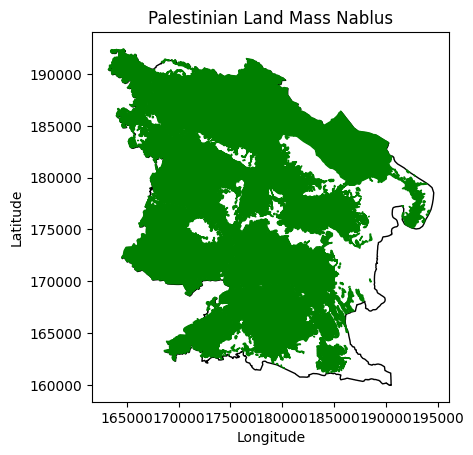

231.07841083713257


In [33]:
# Nablus Governorate
West_Bank_Governorates = Governorates[Governorates['Governorates_Code'] < 2000]
Nablus_gov = West_Bank_Governorates[West_Bank_Governorates['Governorates_Name'] == 'Nablus']
# Clip to Governorate
Nablus_land_mass = gpd.clip(Palestinian_Land_Mass, Nablus_gov)
# Calculate Area for clipped layer
Nablus_land_mass['Area_sqmi'] = Nablus_land_mass['geometry'].to_crs(epsg=28191).area * 3.8610215854245e-7
# Plot for Visualization
fig, ax = plt.subplots()
Nablus_gov.plot(ax = ax, facecolor = "white", edgecolor = "black", label = "Nablus Governorate")
Nablus_land_mass.plot(ax = ax, facecolor = "green", edgecolor = "green", label = "Palestinian Land Mass in Nablus")
plt.title(f"Palestinian Land Mass Nablus")
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()
# Calculate the land mass in areas a, b, c etc..
# Nablus has no seam zone
Nablus_gov_area_a_area = Nablus_land_mass[Nablus_land_mass['CLASS'] == 'A']['Area_sqmi'].sum()
Nablus_gov_area_b_area = Nablus_land_mass[Nablus_land_mass['CLASS'] == 'B']['Area_sqmi'].sum()

Nablus_gov_area_c_area = Nablus_land_mass[Nablus_land_mass['CLASS'] == 'C']['Area_sqmi'].sum() # for total Palestinian land in Area C
Nablus_gov_area = Governorates[Governorates["Governorates_Name"] == "Nablus"]["Area_sqmi"].iloc[0]
print(Nablus_gov_area)
open_or_israeli_area = Nablus_gov_area - Nablus_gov_area_a_area - Nablus_gov_area_b_area - Nablus_gov_area_c_area

# declaring data from land mass calculations
data = [Nablus_gov_area_a_area, Nablus_gov_area_b_area, Nablus_gov_area_c_area, open_or_israeli_area]

# Custom color palette and labels
label_color_dict = {'Palestinian Area A' : '#999393', 'Palestinian Area B' : '#C2185B', 'Palestinian Area C' : '#55872F', 'Undeveloped/Israeli' : '#0000FF'}
labels = list(label_color_dict.keys())
palette_color = list(label_color_dict.values())
custom_labels = [f'{label} ({round(value, 2)})' for label, value in zip(labels, data)]

# Pie chart using plotly
fig = go.Figure(
    data=[
        go.Pie(
            labels=custom_labels,
            values=data,
            marker=dict(colors=palette_color)
            
        )
    ]
)

fig.update_traces(textposition='inside',       # puts text inside the pie chart
                    textinfo = 'percent',        # shows us the percent and the area in sqmi ('percent+label' to show both)
                    textfont_color='white')      # color of the labels inside the pie chart are set to white

fig.update_layout(
    paper_bgcolor='black',       # background color around the plot  
    plot_bgcolor='black',        # background color of the plot
    font_color='white',          # color of the legend and title
    title={
        'text': 'Nablus Governorate Area Distribution (Sqmi)',
        'x': 0.5,                # Middle
        'y': 0.90,                # Nearly at the top
        'xanchor': 'center',
        'yanchor': 'middle',
        'font': {'size': 34}     # Increase font size for the title
    },
    legend={
        'font': {'size': 18},     # Increase font size for the legend
        'x': 1,                   # Position legend to the right of the pie chart
        'y': 0.5,                 # Position legend in the middle
        'xanchor': 'left',
        'yanchor': 'middle'
    },
    annotations=[
        dict(
            text="*Undeveloped/Israeli is land that is currently undeveloped by anyone in Area C or land that is developed by Israelis in Areas B and C",
            x=0.7,
            y=0.05,
            showarrow=False,
            font=dict(color='white', size=12),
            xanchor='center'
        ),
        dict(
            text="July 2025<br>© Palestinian Land Demographics 2025",
            x=1.05,
            y=0.25,
            showarrow=False,
            font=dict(color='white', size=12),
            xanchor='left',
            yanchor='top'
        )
    ],
    width=1000,                  # width and height of the pie chart
    height=1000
)

fig.write_html('July2025/PieCharts_HTML/Nablus_Governorate_Area_Distribution_Pie_Chart.html')
fig.write_image('July2025/PieCharts_JPG/Nablus_Governorate_Area_Distribution_Pie_Chart.jpg')
fig.show()


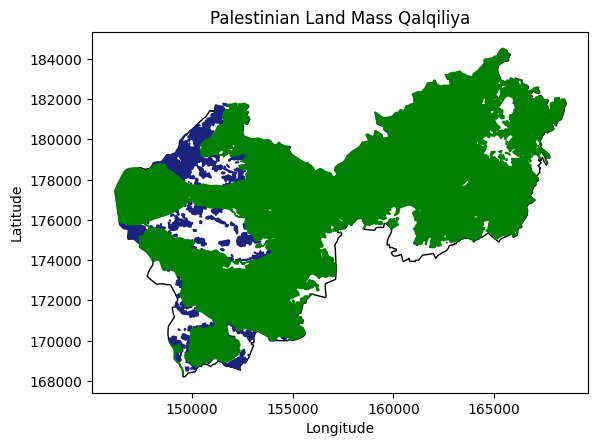

63.83822497040119


In [34]:
# Qalqiliya Governorate
West_Bank_Governorates = Governorates[Governorates['Governorates_Code'] < 2000]
Qalqiliya_gov = West_Bank_Governorates[West_Bank_Governorates['Governorates_Name'] == 'Qalqiliya']
# Clip to Governorate
Qalqiliya_land_mass = gpd.clip(Palestinian_Land_Mass, Qalqiliya_gov)
Qalqiliya_seam_zone = gpd.clip(Seam_Zone, Qalqiliya_gov)
# Calculate Area for clipped layer
Qalqiliya_land_mass['Area_sqmi'] = Qalqiliya_land_mass['geometry'].to_crs(epsg=28191).area * 3.8610215854245e-7
Qalqiliya_seam_zone['Area_sqmi'] = Qalqiliya_seam_zone['geometry'].to_crs(epsg=28191).area * 3.8610215854245e-7
# Plot for Visualization
fig, ax = plt.subplots()
Qalqiliya_gov.plot(ax = ax, facecolor = "white", edgecolor = "black", label = "Qalqiliya Governorate")
Qalqiliya_seam_zone.plot(ax=ax, facecolor = "#1a237e", edgecolor = "#1a237e", label = "Palestinian Seam Zone in Qalqiliya")
Qalqiliya_land_mass.plot(ax = ax, facecolor = "green", edgecolor = "green", label = "Palestinian Land Mass in Qalqiliya")
plt.title(f"Palestinian Land Mass Qalqiliya")
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()
# Calculate the land mass in areas a, b, c etc..
# Qalqiliya_seam_zone['Area_sqmi'].groupby([Qalqiliya_seam_zone['CLASS']]).sum()
Qalqiliya_gov_area_a_area = Qalqiliya_land_mass[Qalqiliya_land_mass['CLASS'] == 'A']['Area_sqmi'].sum()
Qalqiliya_gov_area_b_area = Qalqiliya_land_mass[Qalqiliya_land_mass['CLASS'] == 'B']['Area_sqmi'].sum()
Qalqiliya_area_c_seam_zone = Qalqiliya_seam_zone[Qalqiliya_seam_zone['CLASS'] == 'C']['Area_sqmi'].sum()
Qalqiliya_area_b_seam_zone = Qalqiliya_seam_zone[Qalqiliya_seam_zone['CLASS'] == 'B']['Area_sqmi'].sum()
Qalqiliya_gov_area_c_area = Qalqiliya_land_mass[Qalqiliya_land_mass['CLASS'] == 'C']['Area_sqmi'].sum() + Qalqiliya_area_c_seam_zone + Qalqiliya_area_b_seam_zone # for total Palestinian land in Area C
Qalqiliya_gov_area = Governorates[Governorates["Governorates_Name"] == "Qalqiliya"]["Area_sqmi"].iloc[0]
print(Qalqiliya_gov_area)
open_or_israeli_area = Qalqiliya_gov_area - Qalqiliya_gov_area_a_area - Qalqiliya_gov_area_b_area - Qalqiliya_gov_area_c_area

# declaring data from land mass calculations
data = [Qalqiliya_gov_area_a_area, Qalqiliya_gov_area_b_area, Qalqiliya_gov_area_c_area, open_or_israeli_area]

# Custom color palette and labels
label_color_dict = {'Palestinian Area A' : '#999393', 'Palestinian Area B' : '#C2185B', 'Palestinian Area C' : '#55872F', 'Undeveloped/Israeli' : '#0000FF'}
labels = list(label_color_dict.keys())
palette_color = list(label_color_dict.values())
custom_labels = [f'{label} ({round(value, 2)})' for label, value in zip(labels, data)]

# Pie chart using plotly
fig = go.Figure(
    data=[
        go.Pie(
            labels=custom_labels,
            values=data,
            marker=dict(colors=palette_color)
            
        )
    ]
)

fig.update_traces(textposition='inside',       # puts text inside the pie chart
                    textinfo = 'percent',        # shows us the percent and the area in sqmi ('percent+label' to show both)
                    textfont_color='white')      # color of the labels inside the pie chart are set to white

fig.update_layout(
    paper_bgcolor='black',       # background color around the plot  
    plot_bgcolor='black',        # background color of the plot
    font_color='white',          # color of the legend and title
    title={
        'text': 'Qalqiliya Governorate Area Distribution (Sqmi)',
        'x': 0.5,                # Middle
        'y': 0.90,                # Nearly at the top
        'xanchor': 'center',
        'yanchor': 'middle',
        'font': {'size': 34}     # Increase font size for the title
    },
    legend={
        'font': {'size': 18},     # Increase font size for the legend
        'x': 1,                   # Position legend to the right of the pie chart
        'y': 0.5,                 # Position legend in the middle
        'xanchor': 'left',
        'yanchor': 'middle'
    },
    annotations=[
        dict(
            text="*Undeveloped/Israeli is land that is currently undeveloped by anyone in Area C or land that is developed by Israelis in Areas B and C",
            x=0.7,
            y=0.05,
            showarrow=False,
            font=dict(color='white', size=12),
            xanchor='center'
        ),
        dict(
            text="July 2025<br>© Palestinian Land Demographics 2025",
            x=1.05,
            y=0.25,
            showarrow=False,
            font=dict(color='white', size=12),
            xanchor='left',
            yanchor='top'
        )
    ],
    width=1000,                  # width and height of the pie chart
    height=1000
)

fig.write_html('July2025\PieCharts_HTML\Qalqiliya_Governorate_Area_Distribution_Pie_Chart.html')
fig.write_image('July2025\PieCharts_JPG\Qalqiliya_Governorate_Area_Distribution_Pie_Chart.jpg')
fig.show()


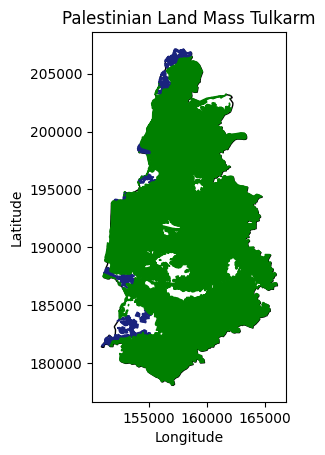

95.1707067791299


In [35]:
# Tulkarm Governorate
West_Bank_Governorates = Governorates[Governorates['Governorates_Code'] < 2000]
Tulkarm_gov = West_Bank_Governorates[West_Bank_Governorates['Governorates_Name'] == 'Tulkarm']
# Clip to Governorate
Tulkarm_land_mass = gpd.clip(Palestinian_Land_Mass, Tulkarm_gov)
Tulkarm_seam_zone = gpd.clip(Seam_Zone, Tulkarm_gov)
# Calculate Area for clipped layer
Tulkarm_land_mass['Area_sqmi'] = Tulkarm_land_mass['geometry'].to_crs(epsg=28191).area * 3.8610215854245e-7
Tulkarm_seam_zone['Area_sqmi'] = Tulkarm_seam_zone['geometry'].to_crs(epsg=28191).area * 3.8610215854245e-7
# Plot for Visualization
fig, ax = plt.subplots()
Tulkarm_gov.plot(ax = ax, facecolor = "white", edgecolor = "black", label = "Tulkarm Governorate")
Tulkarm_seam_zone.plot(ax=ax, facecolor = "#1a237e", edgecolor = "#1a237e", label = "Palestinian Seam Zone in Tulkarm")
Tulkarm_land_mass.plot(ax = ax, facecolor = "green", edgecolor = "green", label = "Palestinian Land Mass in Tulkarm")
plt.title(f"Palestinian Land Mass Tulkarm")
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()
# Calculate the land mass in areas a, b, c etc..
# Tulkarm_seam_zone['Area_sqmi'].groupby([Tulkarm_seam_zone['CLASS']]).sum()
Tulkarm_gov_area_a_area = Tulkarm_land_mass[Tulkarm_land_mass['CLASS'] == 'A']['Area_sqmi'].sum()
Tulkarm_gov_area_b_area = Tulkarm_land_mass[Tulkarm_land_mass['CLASS'] == 'B']['Area_sqmi'].sum()
Tulkarm_area_c_seam_zone = Tulkarm_seam_zone[Tulkarm_seam_zone['CLASS'] == 'C']['Area_sqmi'].sum()
Tulkarm_gov_area_c_area = Tulkarm_land_mass[Tulkarm_land_mass['CLASS'] == 'C']['Area_sqmi'].sum() + Tulkarm_area_c_seam_zone # for total Palestinian land in Area C
Tulkarm_gov_area = Governorates[Governorates["Governorates_Name"] == "Tulkarm"]["Area_sqmi"].iloc[0]
print(Tulkarm_gov_area)
open_or_israeli_area = Tulkarm_gov_area - Tulkarm_gov_area_a_area - Tulkarm_gov_area_b_area - Tulkarm_gov_area_c_area

# declaring data from land mass calculations
data = [Tulkarm_gov_area_a_area, Tulkarm_gov_area_b_area, Tulkarm_gov_area_c_area, open_or_israeli_area]

# Custom color palette and labels
label_color_dict = {'Palestinian Area A' : '#999393', 'Palestinian Area B' : '#C2185B', 'Palestinian Area C' : '#55872F', 'Undeveloped/Israeli' : '#0000FF'}
labels = list(label_color_dict.keys())
palette_color = list(label_color_dict.values())
custom_labels = [f'{label} ({round(value, 2)})' for label, value in zip(labels, data)]

# Pie chart using plotly
fig = go.Figure(
    data=[
        go.Pie(
            labels=custom_labels,
            values=data,
            marker=dict(colors=palette_color)
            
        )
    ]
)

fig.update_traces(textposition='inside',       # puts text inside the pie chart
                    textinfo = 'percent',        # shows us the percent and the area in sqmi ('percent+label' to show both)
                    textfont_color='white')      # color of the labels inside the pie chart are set to white

fig.update_layout(
    paper_bgcolor='black',       # background color around the plot  
    plot_bgcolor='black',        # background color of the plot
    font_color='white',          # color of the legend and title
    title={
        'text': 'Tulkarm Governorate Area Distribution (Sqmi)',
        'x': 0.5,                # Middle
        'y': 0.90,                # Nearly at the top
        'xanchor': 'center',
        'yanchor': 'middle',
        'font': {'size': 34}     # Increase font size for the title
    },
    legend={
        'font': {'size': 18},     # Increase font size for the legend
        'x': 1,                   # Position legend to the right of the pie chart
        'y': 0.5,                 # Position legend in the middle
        'xanchor': 'left',
        'yanchor': 'middle'
    },
    annotations=[
        dict(
            text="*Undeveloped/Israeli is land that is currently undeveloped by anyone in Area C or land that is developed by Israelis in Areas B and C",
            x=0.7,
            y=0.05,
            showarrow=False,
            font=dict(color='white', size=12),
            xanchor='center'
        ),
        dict(
            text="July 2025<br>© Palestinian Land Demographics 2025",
            x=1.05,
            y=0.25,
            showarrow=False,
            font=dict(color='white', size=12),
            xanchor='left',
            yanchor='top'
        )
    ],
    width=1000,                  # width and height of the pie chart
    height=1000
)

fig.write_html('July2025\PieCharts_HTML\Tulkarm_Governorate_Area_Distribution_Pie_Chart.html')
fig.write_image('July2025\PieCharts_JPG\Tulkarm_Governorate_Area_Distribution_Pie_Chart.jpg')
fig.show()

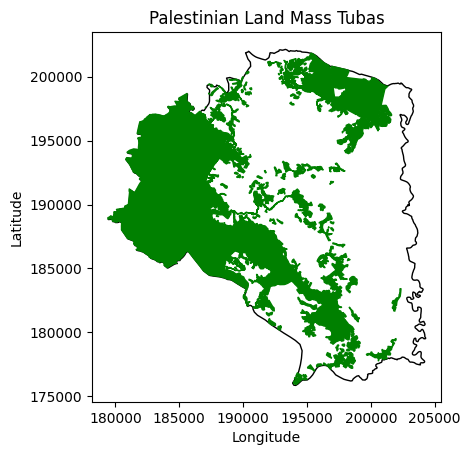

157.8183492280824


In [36]:
# Tubas Governorate
West_Bank_Governorates = Governorates[Governorates['Governorates_Code'] < 2000]
Tubas_gov = West_Bank_Governorates[West_Bank_Governorates['Governorates_Name'] == 'Tubas']
# Clip to Governorate
Tubas_land_mass = gpd.clip(Palestinian_Land_Mass, Tubas_gov)

# Calculate Area for clipped layer
Tubas_land_mass['Area_sqmi'] = Tubas_land_mass['geometry'].to_crs(epsg=28191).area * 3.8610215854245e-7

# Plot for Visualization
fig, ax = plt.subplots()
Tubas_gov.plot(ax = ax, facecolor = "white", edgecolor = "black", label = "Tubas Governorate")

Tubas_land_mass.plot(ax = ax, facecolor = "green", edgecolor = "green", label = "Palestinian Land Mass in Tubas")
plt.title(f"Palestinian Land Mass Tubas")
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()
# Calculate the land mass in areas a, b, c etc..
# Tubas_seam_zone['Area_sqmi'].groupby([Tubas_seam_zone['CLASS']]).sum()
Tubas_gov_area_a_area = Tubas_land_mass[Tubas_land_mass['CLASS'] == 'A']['Area_sqmi'].sum()
Tubas_gov_area_b_area = Tubas_land_mass[Tubas_land_mass['CLASS'] == 'B']['Area_sqmi'].sum()

Tubas_gov_area_c_area = Tubas_land_mass[Tubas_land_mass['CLASS'] == 'C']['Area_sqmi'].sum()  # for total Palestinian land in Area C
Tubas_gov_area = Governorates[Governorates["Governorates_Name"] == "Tubas"]["Area_sqmi"].iloc[0]
print(Tubas_gov_area)
open_or_israeli_area = Tubas_gov_area - Tubas_gov_area_a_area - Tubas_gov_area_b_area - Tubas_gov_area_c_area

# declaring data from land mass calculations
data = [Tubas_gov_area_a_area, Tubas_gov_area_b_area, Tubas_gov_area_c_area, open_or_israeli_area]

# Custom color palette and labels
label_color_dict = {'Palestinian Area A' : '#999393', 'Palestinian Area B' : '#C2185B', 'Palestinian Area C' : '#55872F', 'Undeveloped/Israeli' : '#0000FF'}
labels = list(label_color_dict.keys())
palette_color = list(label_color_dict.values())
custom_labels = [f'{label} ({round(value, 2)})' for label, value in zip(labels, data)]

# Pie chart using plotly
fig = go.Figure(
    data=[
        go.Pie(
            labels=custom_labels,
            values=data,
            marker=dict(colors=palette_color)
            
        )
    ]
)

fig.update_traces(textposition='inside',       # puts text inside the pie chart
                    textinfo = 'percent',        # shows us the percent and the area in sqmi ('percent+label' to show both)
                    textfont_color='white')      # color of the labels inside the pie chart are set to white

fig.update_layout(
    paper_bgcolor='black',       # background color around the plot  
    plot_bgcolor='black',        # background color of the plot
    font_color='white',          # color of the legend and title
    title={
        'text': 'Tubas Governorate Area Distribution (Sqmi)',
        'x': 0.5,                # Middle
        'y': 0.90,                # Nearly at the top
        'xanchor': 'center',
        'yanchor': 'middle',
        'font': {'size': 34}     # Increase font size for the title
    },
    legend={
        'font': {'size': 18},     # Increase font size for the legend
        'x': 1,                   # Position legend to the right of the pie chart
        'y': 0.5,                 # Position legend in the middle
        'xanchor': 'left',
        'yanchor': 'middle'
    },
    annotations=[
        dict(
            text="*Undeveloped/Israeli is land that is currently undeveloped by anyone in Area C or land that is developed by Israelis in Area C",
            x=0.7,
            y=0.05,
            showarrow=False,
            font=dict(color='white', size=12),
            xanchor='center'
        ),
        dict(
            text="July 2025<br>© Palestinian Land Demographics 2025",
            x=1.05,
            y=0.25,
            showarrow=False,
            font=dict(color='white', size=12),
            xanchor='left',
            yanchor='top'
        )
    ],
    width=1000,                  # width and height of the pie chart
    height=1000
)

fig.write_html('July2025\PieCharts_HTML\Tubas_Governorate_Area_Distribution_Pie_Chart.html')
fig.write_image('July2025\PieCharts_JPG\Tubas_Governorate_Area_Distribution_Pie_Chart.jpg')
fig.show()

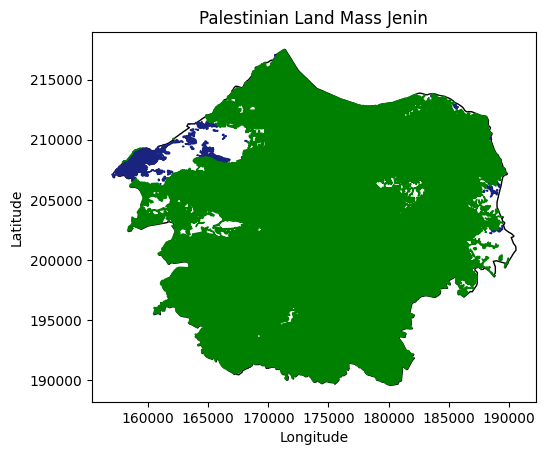

225.36564606965112


In [37]:
# Jenin Governorate
West_Bank_Governorates = Governorates[Governorates['Governorates_Code'] < 2000]
Jenin_gov = West_Bank_Governorates[West_Bank_Governorates['Governorates_Name'] == 'Jenin']
# Clip to Governorate
Jenin_land_mass = gpd.clip(Palestinian_Land_Mass, Jenin_gov)
Jenin_seam_zone = gpd.clip(Seam_Zone, Jenin_gov)
# Calculate Area for clipped layer
Jenin_land_mass['Area_sqmi'] = Jenin_land_mass['geometry'].to_crs(epsg=28191).area * 3.8610215854245e-7
Jenin_seam_zone['Area_sqmi'] = Jenin_seam_zone['geometry'].to_crs(epsg=28191).area * 3.8610215854245e-7
# Plot for Visualization
fig, ax = plt.subplots()
Jenin_gov.plot(ax = ax, facecolor = "white", edgecolor = "black", label = "Jenin Governorate")
Jenin_seam_zone.plot(ax=ax, facecolor = "#1a237e", edgecolor = "#1a237e", label = "Palestinian Seam Zone in Jenin")
Jenin_land_mass.plot(ax = ax, facecolor = "green", edgecolor = "green", label = "Palestinian Land Mass in Jenin")
plt.title(f"Palestinian Land Mass Jenin")
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()
# Calculate the land mass in areas a, b, c etc..
# Jenin_seam_zone['Area_sqmi'].groupby([Jenin_seam_zone['CLASS']]).sum()  
Jenin_gov_area_a_area = Jenin_land_mass[Jenin_land_mass['CLASS'] == 'A']['Area_sqmi'].sum()
Jenin_gov_area_b_area = Jenin_land_mass[Jenin_land_mass['CLASS'] == 'B']['Area_sqmi'].sum()
Jenin_area_c_seam_zone = Jenin_seam_zone[Jenin_seam_zone['CLASS'] == 'C']['Area_sqmi'].sum()
Jenin_area_b_seam_zone = Jenin_seam_zone[Jenin_seam_zone['CLASS'] == 'B']['Area_sqmi'].sum()
Jenin_gov_area_c_area = Jenin_land_mass[Jenin_land_mass['CLASS'] == 'C']['Area_sqmi'].sum() + Jenin_area_c_seam_zone + Jenin_area_b_seam_zone # for total Palestinian land in Area C
Jenin_gov_area = Governorates[Governorates["Governorates_Name"] == "Jenin"]["Area_sqmi"].iloc[0]
print(Jenin_gov_area)
open_or_israeli_area = Jenin_gov_area - Jenin_gov_area_a_area - Jenin_gov_area_b_area - Jenin_gov_area_c_area

# declaring data from land mass calculations
data = [Jenin_gov_area_a_area, Jenin_gov_area_b_area, Jenin_gov_area_c_area, open_or_israeli_area]

# Custom color palette and labels
label_color_dict = {'Palestinian Area A' : '#999393', 'Palestinian Area B' : '#C2185B', 'Palestinian Area C' : '#55872F', 'Undeveloped/Israeli' : '#0000FF'}
labels = list(label_color_dict.keys())
palette_color = list(label_color_dict.values())
custom_labels = [f'{label} ({round(value, 2)})' for label, value in zip(labels, data)]

# Pie chart using plotly
fig = go.Figure(
    data=[
        go.Pie(
            labels=custom_labels,
            values=data,
            marker=dict(colors=palette_color)
            
        )
    ]
)

fig.update_traces(textposition='inside',       # puts text inside the pie chart
                    textinfo = 'percent',        # shows us the percent and the area in sqmi ('percent+label' to show both)
                    textfont_color='white')      # color of the labels inside the pie chart are set to white

fig.update_layout(
    paper_bgcolor='black',       # background color around the plot  
    plot_bgcolor='black',        # background color of the plot
    font_color='white',          # color of the legend and title
    title={
        'text': 'Jenin Governorate Area Distribution (Sqmi)',
        'x': 0.5,                # Middle
        'y': 0.90,                # Nearly at the top
        'xanchor': 'center',
        'yanchor': 'middle',
        'font': {'size': 34}     # Increase font size for the title
    },
    legend={
        'font': {'size': 18},     # Increase font size for the legend
        'x': 1,                   # Position legend to the right of the pie chart
        'y': 0.5,                 # Position legend in the middle
        'xanchor': 'left',
        'yanchor': 'middle'
    },
    annotations=[
        dict(
            text="*Undeveloped/Israeli is land that is currently undeveloped by anyone in Area C or land that is developed by Israelis in Areas B and C",
            x=0.7,
            y=0.05,
            showarrow=False,
            font=dict(color='white', size=12),
            xanchor='center'
        ),
        dict(
            text="July 2025<br>© Palestinian Land Demographics 2025",
            x=1.05,
            y=0.25,
            showarrow=False,
            font=dict(color='white', size=12),
            xanchor='left',
            yanchor='top'
        )
    ],
    width=1000,                  # width and height of the pie chart
    height=1000
)

fig.write_html('July2025\PieCharts_HTML\Jenin_Governorate_Area_Distribution_Pie_Chart.html')
fig.write_image('July2025\PieCharts_JPG\Jenin_Governorate_Area_Distribution_Pie_Chart.jpg')
fig.show()